In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj][0]
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
PSf_10wt_1 = pd.read_csv('Data/10% 30min RT - 1 - 1_07262023_150228.csv')
PSf_10wt_2 = pd.read_csv('Data/10% 30min RT - 1 - 2_07262023_150823.csv')
PSf_10wt_3 = pd.read_csv('Data/10% 30min RT - 1 - 3_07262023_151144.csv')
PSf_15wt_1 = pd.read_csv('Data/15% 30min RT - 1 - 1_07262023_144613.csv')
PSf_15wt_2 = pd.read_csv('Data/15% 30min RT - 1 - 2_07262023_145224.csv')
PSf_15wt_3 = pd.read_csv('Data/15% 30min RT - 1 - 3_07262023_145717.csv')
# put these into a list
data_list = [PSf_10wt_1, PSf_10wt_2, PSf_10wt_3, PSf_15wt_1, PSf_15wt_2, PSf_15wt_3]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

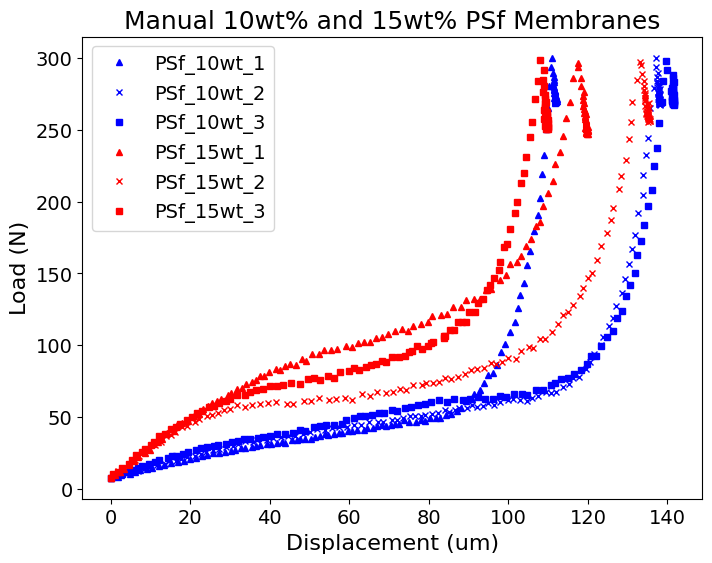

In [3]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
# make a list of 6 different line types with different colors
line_type = ['b^', 'bx', 'bs', 'r^', 'rx', 'rs']
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 8]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    # plot less frequent data points
    plt.plot(data['S:LVDT (um)'][::80], data['Ch:Load (N)'][::80], line_type[i], label=data_name, markersize=4)
    #plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], line_type[i] ,label=data_name)

# show title and labels
plt.title('Manual 10wt% and 15wt% PSf Membranes', fontsize=18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Displacement (um)', fontsize = 16)
plt.ylabel('Load (N)', fontsize = 16)
plt.legend(loc='upper left', fontsize= 14)
plt.show()

In [4]:
# save the S:LVDT (um) value at the maximum Ch:Load (N) for each test
max_displacement = []
for df in data_list:
    df = df[df['Ch:Load (N)'] > 8]
    df['S:LVDT (um)'] = df['S:LVDT (um)'] - df['S:LVDT (um)'].iloc[0]
    # find the index of the maximum load
    max_load_index = df['Ch:Load (N)'].idxmax()
    # save the S:LVDT value at the maximum load
    max_load = df.loc[max_load_index, 'S:LVDT (um)']
    max_displacement.append(max_load)
max_displacement




[110.71859999999998,
 137.1092,
 139.39519999999996,
 117.60199999999986,
 133.0706,
 107.74680000000012]

In [5]:
top_layer_thickness = [18.51, 15.5371,13.8596,25.6578,17.9823,22.19]

In [6]:
top_layer_thickness_percent = [0.1344,0.128078238,0.111179379,0.196029451,0.145393219,0.1828]


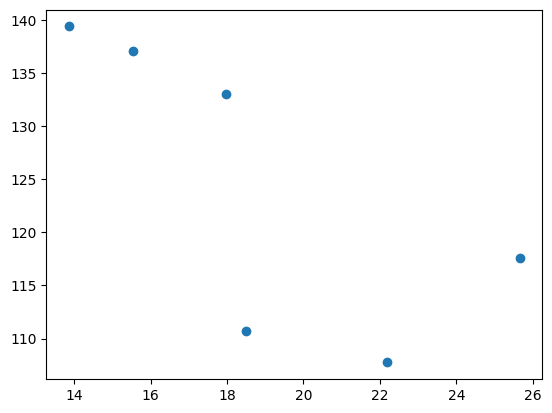

In [7]:
# plot top_layer_thickness over max_displacement
plt.scatter(top_layer_thickness,max_displacement)

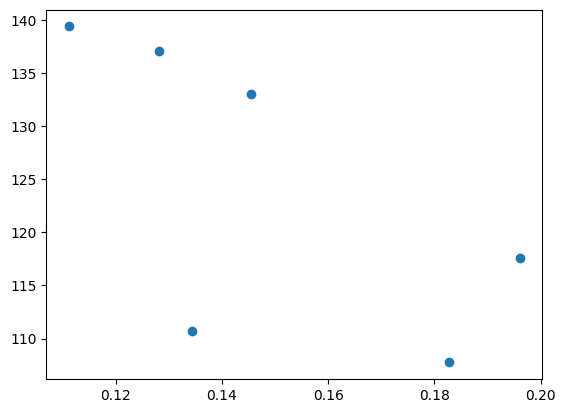

In [8]:
plt.scatter(top_layer_thickness_percent,max_displacement)

# I-18

In [9]:
I18_1 = pd.read_csv('Data/I-18_1_1_07282023_141413.csv')
I18_2 = pd.read_csv('Data/I-18_1_2_07282023_141649.csv')
I18_3 = pd.read_csv('Data/I-18_1_3_07282023_141913.csv')
I18_4 = pd.read_csv('Data/I-18_1_4_07282023_142145.csv')
I18_5 = pd.read_csv('Data/I-18_1_5_07282023_142425.csv')
data_list = [I18_1, I18_2, I18_3, I18_4, I18_5]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

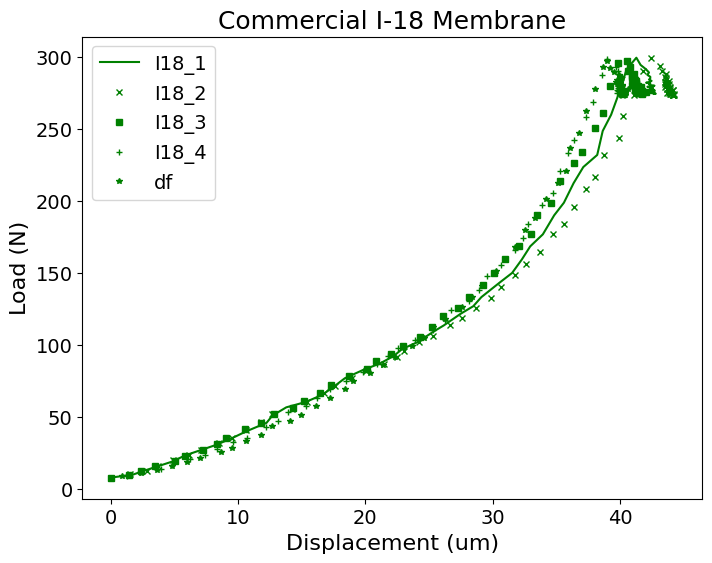

In [10]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
# make a list of 6 different line types with green color
line_type = ['g', 'gx', 'gs', 'g+', 'g*', 'gh']
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 8]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'][::80], data['Ch:Load (N)'][::80], line_type[i], label=data_name, markersize=4)
    #plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], line_type[i], label=data_name, makersize=4)
# show title and labels
plt.title('Commercial I-18 Membrane', fontsize=18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xlabel('Displacement (um)', fontsize = 16)
plt.ylabel('Load (N)', fontsize = 16)
plt.legend(loc='upper left', fontsize= 14)
plt.show()

# I-18 Polished pin

In [11]:
Polished_I18_1_1 = pd.read_csv('Data/Polished Pin I-18 - 1_08162023_160535.csv')
Polished_I18_1_2 = pd.read_csv('Data/Polished Pin I-18 - 2_08162023_161036.csv')
Polished_I18_1_3 = pd.read_csv('Data/Polished Pin I-18 - 3_08162023_161240.csv')
Polished_I18_1_4 = pd.read_csv('Data/Polished Pin I-18 - 4_08162023_161454.csv')
Polished_I18_1_5 = pd.read_csv('Data/Polished Pin I-18 - 5_08162023_161721.csv')
data_list = [Polished_I18_1_1, Polished_I18_1_2, Polished_I18_1_3, Polished_I18_1_4, Polished_I18_1_5]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

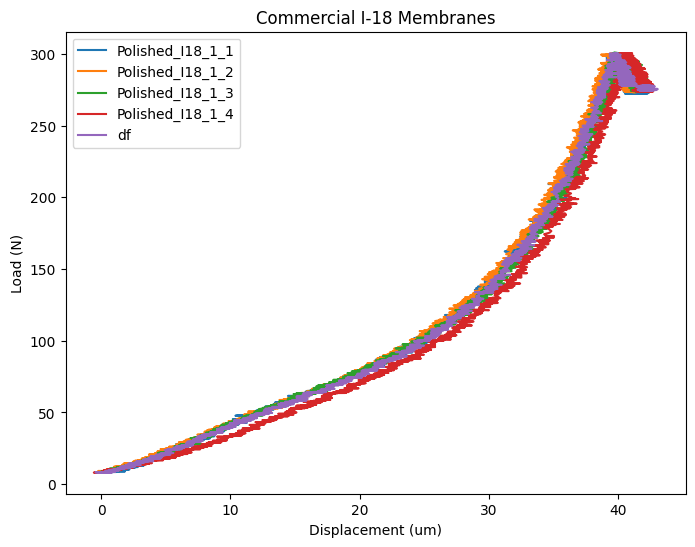

In [12]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 8]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Commercial I-18 Membranes')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

# I-18 Lathed Pin


In [13]:
I18_1 = pd.read_csv('Data/I-18_1_1_07282023_141413.csv')
I18_2 = pd.read_csv('Data/I-18_1_2_07282023_141649.csv')
I18_3 = pd.read_csv('Data/I-18_1_3_07282023_141913.csv')
I18_4 = pd.read_csv('Data/I-18_1_4_07282023_142145.csv')
I18_5 = pd.read_csv('Data/I-18_1_5_07282023_142425.csv')
Lathed_I18_1_1 = pd.read_csv('Data/I-18 Lathed test 1_10242023_165010.csv')
Lathed_I18_1_2 = pd.read_csv('Data/I-18 Lathed test 2_10242023_165238.csv')
Lathed_I18_1_3 = pd.read_csv('Data/I-18 Lathed test 3_10242023_165444.csv') 
Lathed_I18_1_4 = pd.read_csv('Data/I-18 Lathed test 4_10242023_165714.csv')
Lathed_I18_1_5 = pd.read_csv('Data/I-18 Lathed test 5_10242023_165935.csv')
data_list = [I18_1, I18_2, I18_3, I18_4, I18_5, Lathed_I18_1_1, Lathed_I18_1_2, Lathed_I18_1_3, Lathed_I18_1_4, Lathed_I18_1_5]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

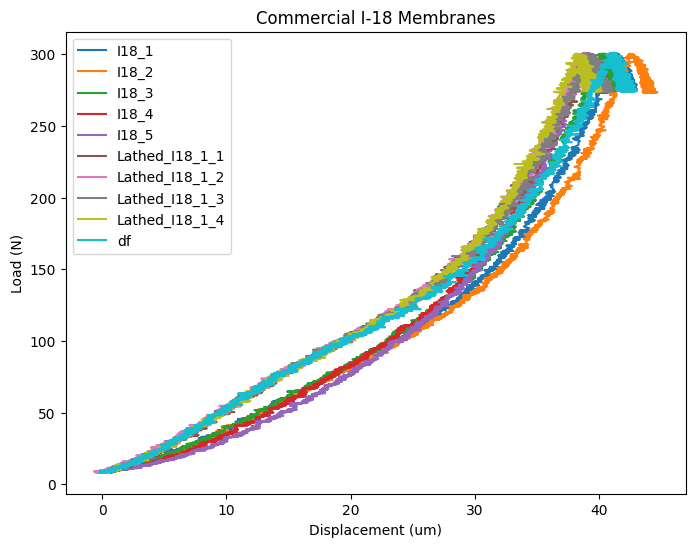

In [14]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 8]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Commercial I-18 Membranes')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

# Symmetrical Membranes

In [15]:
#PVDF_5um_1 = pd.read_csv('Data/Symmetrical membranes compression/Durapore PVDF 5um test 1_10272023_145107.csv')   
#PVDF_5um_2 = pd.read_csv('Data/Symmetrical membranes compression/Durapore PVDF 5um test 2_10272023_145343.csv')
PVDF_5um_3 = pd.read_csv('Data/Symmetrical membranes compression/Durapore PVDF 5um test 3_10272023_145600.csv')
#PVDF_02um_1 = pd.read_csv('Data/Symmetrical membranes compression/Sterlitech PVDF 02um test 1_10272023_144136.csv')
PVDF_02um_2 = pd.read_csv('Data/Symmetrical membranes compression/Sterlitech PVDF 02um test 2_10272023_144332.csv')
#PVDF_02um_3 = pd.read_csv('Data/Symmetrical membranes compression/Sterlitech PVDF 02um test 3_10272023_144603.csv')
#PVDF_045um_1 = pd.read_csv('Data/Symmetrical membranes compression/Sterlitech PVDF 045um test 1_10272023_143339.csv')
#PVDF_045um_2 = pd.read_csv('Data/Symmetrical membranes compression/Sterlitech PVDF 045um test 2_10272023_143615.csv')
PVDF_045um_3 = pd.read_csv('Data/Symmetrical membranes compression/Sterlitech PVDF 045um test 3_10272023_143826.csv')
PES_045um_1 = pd.read_csv('Data/Symmetrical membranes compression/Millioire Express PES 045um test 1_10302023_172215.csv')
#PES_045um_2 = pd.read_csv('Data/Symmetrical membranes compression/Millioire Express PES 045um test 2_10302023_172437.csv')
#PES_045um_3 = pd.read_csv('Data/Symmetrical membranes compression/Millioire Express PES 045um test 3_10302023_172724.csv')
#Cellulose_Nitrate_5um_1 = pd.read_csv('Data/Symmetrical membranes compression/Sartorius Cellulose Nitrate 5um test 1_10302023_165819.csv')
Cellulose_Nitrate_5um_2 = pd.read_csv('Data/Symmetrical membranes compression/Sartorius Cellulose Nitrate 5um test 2_10302023_170238.csv')
#Cellulose_Nitrate_5um_3 = pd.read_csv('Data/Symmetrical membranes compression/Sartorius Cellulose Nitrate 5um test 3_10302023_170908.csv')
Cellulose_Nitrate_045um_1 = pd.read_csv('Data/Symmetrical membranes compression/Sartorius Cellulose Nitrate 045um test 1_10302023_171307.csv')
#Cellulose_Nitrate_045um_2 = pd.read_csv('Data/Symmetrical membranes compression/Sartorius Cellulose Nitrate 045um test 2_10302023_171617.csv')
#Cellulose_Nitrate_045um_3 = pd.read_csv('Data/Symmetrical membranes compression/Sartorius Cellulose Nitrate 045um test 3_10302023_171835.csv')

data_list = [PVDF_5um_3, PVDF_02um_2, PVDF_045um_3, PES_045um_1, Cellulose_Nitrate_5um_2, Cellulose_Nitrate_045um_1]
thickness = [160, 124, 116, 142.5, 144, 127]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    

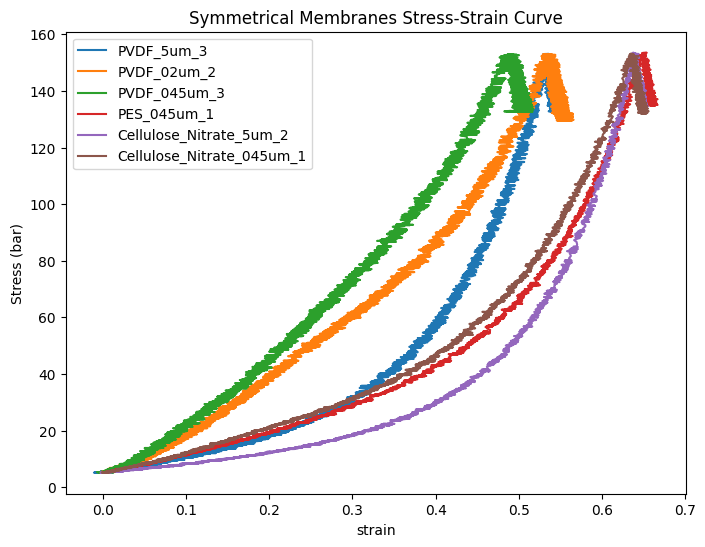

In [16]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 10]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('Symmetrical Membranes Stress-Strain Curve')
plt.xlabel('strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()

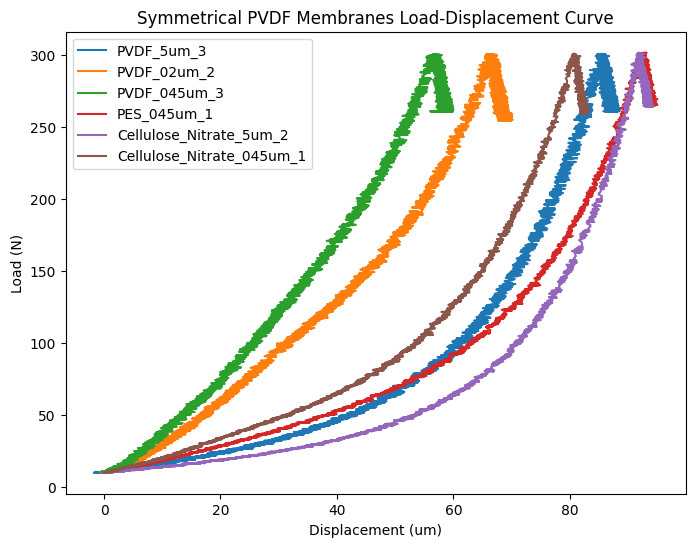

In [17]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 10]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Symmetrical PVDF Membranes Load-Displacement Curve')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

In [18]:
PVDF_5um_1 = pd.read_csv('Data/Symmetrical membranes compression/Durapore PVDF 5um test 1_10272023_145107.csv')   
PVDF_5um_2 = pd.read_csv('Data/Symmetrical membranes compression/Durapore PVDF 5um test 2_10272023_145343.csv')
PVDF_5um_3 = pd.read_csv('Data/Symmetrical membranes compression/Durapore PVDF 5um test 3_10272023_145600.csv')
PVDF_5um_2_1 = pd.read_csv('Data/Symmetrical membranes compression/Durapore PVDF 5um test 2-1.csv')   
PVDF_5um_2_2 = pd.read_csv('Data/Symmetrical membranes compression/Durapore PVDF 5um test 2-2.csv')
PVDF_5um_2_3 = pd.read_csv('Data/Symmetrical membranes compression/Durapore PVDF 5um test 2-3.csv')


data_list = [PVDF_5um_1, PVDF_5um_2, PVDF_5um_3, PVDF_5um_2_1, PVDF_5um_2_2, PVDF_5um_2_3]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

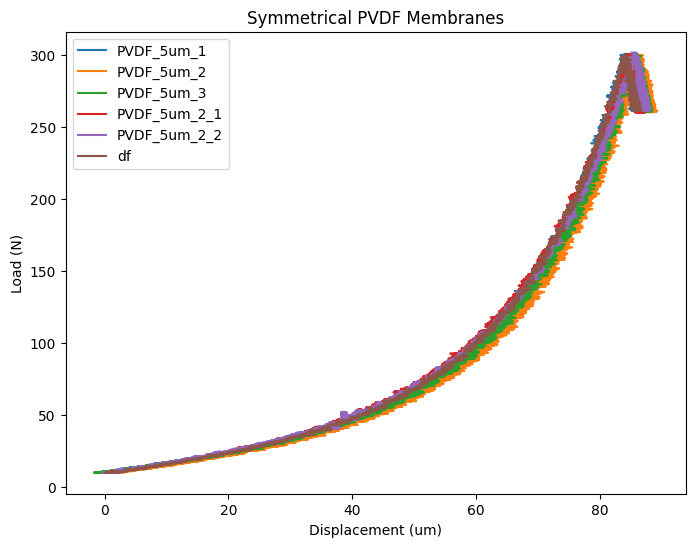

In [19]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 10]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Symmetrical PVDF Membranes')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

# New Pin I-18

In [20]:
New_pin_I18_1_1 = pd.read_csv('Data/New pin I-18-1_08172023_165722.csv')
New_pin_I18_1_2 = pd.read_csv('Data/New pin I-18-2_08172023_170006.csv')
#New_pin_I18_1_3 = pd.read_csv('Data/New pin I-18-3_08172023_170343.csv')
New_pin_I18_1_4 = pd.read_csv('Data/New pin I-18-4_08172023_171119.csv')
New_pin_I18_1_5 = pd.read_csv('Data/New pin I-18-5_08172023_171354.csv')
New_pin_I18_1_6 = pd.read_csv('Data/New pin I-18-6_08172023_171616.csv')
Polished_I18_1_1 = pd.read_csv('Data/Polished Pin I-18 - 1_08162023_160535.csv')
Polished_I18_1_2 = pd.read_csv('Data/Polished Pin I-18 - 2_08162023_161036.csv')
Polished_I18_1_3 = pd.read_csv('Data/Polished Pin I-18 - 3_08162023_161240.csv')
Polished_I18_1_4 = pd.read_csv('Data/Polished Pin I-18 - 4_08162023_161454.csv')
Polished_I18_1_5 = pd.read_csv('Data/Polished Pin I-18 - 5_08162023_161721.csv')
New_pin_I18_old_sample_1_1 = pd.read_csv('Data/New pin I-18 old sample 1_08172023_174518.csv')
New_pin_I18_old_sample_1_2 = pd.read_csv('Data/New pin I-18 old sample 2_08172023_174820.csv')
New_pin_I18_old_sample_1_3 = pd.read_csv('Data/New pin I-18 old sample 3_08172023_175117.csv')
New_pin_I18_old_sample_1_4 = pd.read_csv('Data/New pin I-18 old sample 4_08172023_175409.csv')
New_pin_I18_old_sample_1_5 = pd.read_csv('Data/New pin I-18 old sample 5_08172023_175638.csv')
#data_list = [New_pin_I18_1_1, New_pin_I18_1_2, New_pin_I18_1_3, New_pin_I18_1_4, New_pin_I18_1_5, New_pin_I18_1_6]
data_list = [New_pin_I18_1_1, New_pin_I18_1_2, New_pin_I18_1_4, New_pin_I18_1_5, New_pin_I18_1_6, Polished_I18_1_1, Polished_I18_1_2, Polished_I18_1_3, Polished_I18_1_4, Polished_I18_1_5, New_pin_I18_old_sample_1_1, New_pin_I18_old_sample_1_2, New_pin_I18_old_sample_1_3, New_pin_I18_old_sample_1_4, New_pin_I18_old_sample_1_5]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

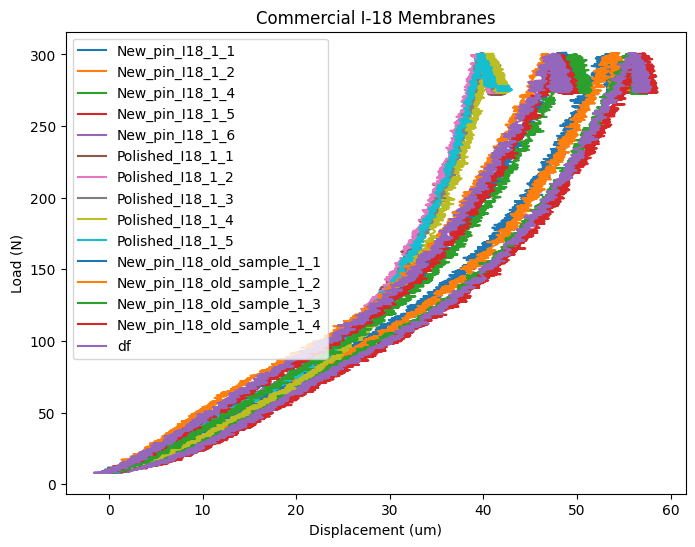

In [21]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 8]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Commercial I-18 Membranes')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

# All pin I-18 compare

In [22]:
I18_1_1 = pd.read_csv('Data/I-18_1_1_07282023_141413.csv')
Polished_I18_1_1 = pd.read_csv('Data/Polished Pin I-18 - 1_08162023_160535.csv')
New_pin_I18_old_sample_1_1 = pd.read_csv('Data/New pin I-18 old sample 1_08172023_174518.csv')
New_pin_I18_1_1 = pd.read_csv('Data/New pin I-18-1_08172023_165722.csv')
data_list = [I18_1_1, Polished_I18_1_1, New_pin_I18_old_sample_1_1, New_pin_I18_1_1]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

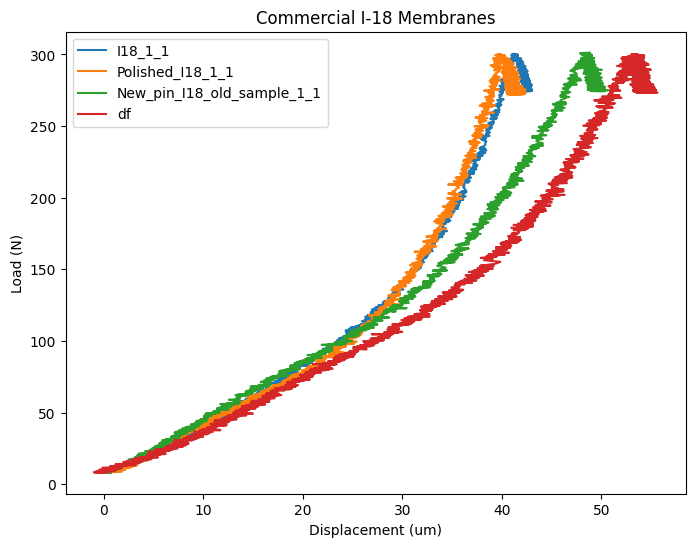

In [23]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 8]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Commercial I-18 Membranes')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

# New Pin AD

In [24]:
New_pin_AD_1_1 = pd.read_csv('Data/New pin align test AD_08172023_162204.csv')
New_pin_AD_1_3 = pd.read_csv('Data/New pin align test AD 3_08172023_164742.csv')
New_pin_AD_1_4 = pd.read_csv('Data/New pin align test AD 4_08172023_165008.csv')
New_pin_AD_1_5 = pd.read_csv('Data/New pin align test AD 5_08172023_165203.csv')
New_pin_AD_1_6 = pd.read_csv('Data/New pin align test AD 6_08172023_165409.csv')
data_list = [New_pin_AD_1_1, New_pin_AD_1_3, New_pin_AD_1_4, New_pin_AD_1_5, New_pin_AD_1_6]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

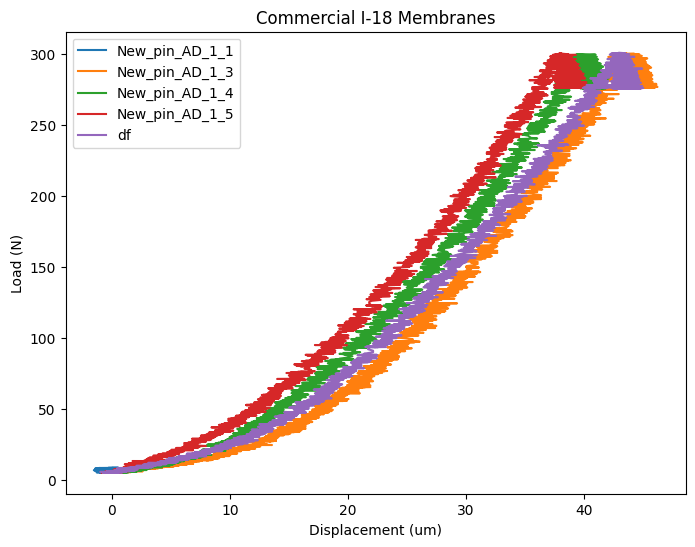

In [25]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 5]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Commercial I-18 Membranes')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

# New Old I-18

In [26]:
New_old_I18_1 = pd.read_csv('Data/New old I18 1_08182023_114853.csv')
New_old_I18_2 = pd.read_csv('Data/New old I18 2_08182023_115420.csv')
New_old_I18_3 = pd.read_csv('Data/New old I18 3_08182023_115753.csv')
New_old_I18_4_new_align = pd.read_csv('Data/New old I18 4 new align_08182023_120245.csv')
New_old_I18_5_new_align = pd.read_csv('Data/New old I18 5 new align_08182023_120847.csv')
New_old_I18_6_new_align = pd.read_csv('Data/New old I18 6 new align_08182023_121251.csv')
New_old_I18_7_new_align = pd.read_csv('Data/New old I18 7 new align_08182023_121647.csv')
data_list = [New_old_I18_1, New_old_I18_2, New_old_I18_3, New_old_I18_4_new_align, New_old_I18_5_new_align, New_old_I18_6_new_align, New_old_I18_7_new_align]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

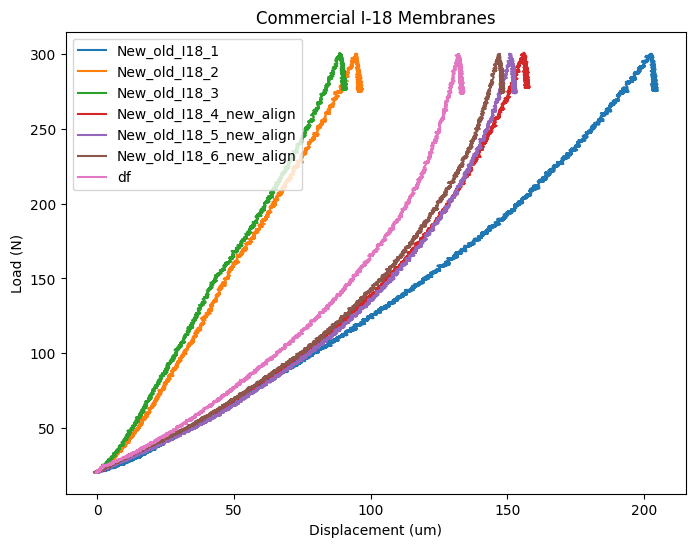

In [27]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 20]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Commercial I-18 Membranes')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

# New New I18

In [28]:
New_new_I18_1_new_align = pd.read_csv('Data/New new I18 1 new align_08182023_122046.csv')
New_new_I18_2_new_align = pd.read_csv('Data/New new I18 2 new align_08182023_122428.csv')
New_new_I18_3_new_align = pd.read_csv('Data/New new I18 3 new align_08182023_122823.csv')
New_new_I18_4_new_align = pd.read_csv('Data/New new I18 4 new align_08182023_123207.csv')
New_new_I18_5_new_align = pd.read_csv('Data/New new I18 5 new align_08182023_123735.csv')
#data_list = [New_new_I18_1_new_align, New_new_I18_3_new_align, New_new_I18_4_new_align, New_new_I18_5_new_align, New_old_I18_2, New_old_I18_3, New_old_I18_4_new_align, New_old_I18_5_new_align, New_old_I18_6_new_align, New_pin_I18_old_sample_1_1, New_pin_I18_old_sample_1_2, New_pin_I18_old_sample_1_3, New_pin_I18_old_sample_1_4, New_pin_I18_old_sample_1_5, New_pin_I18_1_1, New_pin_I18_1_2, New_pin_I18_1_4, New_pin_I18_1_5, New_pin_I18_1_6]
#data_list = [New_new_I18_1_new_align, New_old_I18_3, New_old_I18_5_new_align, New_pin_I18_old_sample_1_1, New_pin_I18_1_1]
Sample2_Alignment1_before = New_pin_I18_1_1
Sample1_Alignment1_after = New_pin_I18_old_sample_1_1
Sample1_Alignment2_after = New_old_I18_3
Sample1_Alignment3_after = New_old_I18_5_new_align
Sample2_Alignment3_after = New_new_I18_1_new_align

data_list = [I18_1_1, Polished_I18_1_1, Sample2_Alignment1_before, Sample1_Alignment1_after, Sample1_Alignment2_after, Sample1_Alignment3_after, Sample2_Alignment3_after]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

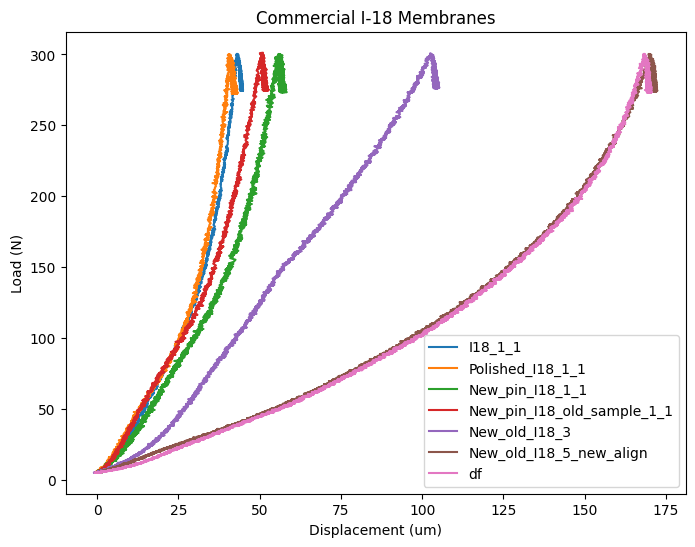

In [29]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 5]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Commercial I-18 Membranes')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='lower right')
plt.show()

# Polished pin I18 After

In [30]:
Polished_I18_1 = pd.read_csv('Data/I-18 Polished After 1_08182023_170759.csv')
Polished_I18_2 = pd.read_csv('Data/I-18 Polished After 2_08182023_171106.csv')
Polished_I18_3 = pd.read_csv('Data/I-18 Polished After 3_08182023_171310.csv')
Polished_I18_4 = pd.read_csv('Data/I-18 Polished After 4_08182023_171528.csv')
Polished_I18_5 = pd.read_csv('Data/I-18 Polished After 5_08182023_171901.csv')
Polished_old_I18_1 = pd.read_csv('Data/Polished old I18 after 1_08182023_173538.csv')
Polished_old_I18_2 = pd.read_csv('Data/Polished old I18 after 2_08182023_173843.csv')
Polished_old_I18_3 = pd.read_csv('Data/Polished old I18 after 3_08182023_174104.csv')
data_list = [Polished_I18_1, Polished_I18_2, Polished_I18_3, Polished_I18_4, Polished_I18_5, Polished_I18_1_1, Polished_I18_1_2, Polished_I18_1_3, Polished_I18_1_4, Polished_I18_1_5, Polished_old_I18_1, Polished_old_I18_2, Polished_old_I18_3]
# convert in to um
for df in data_list:
    df['S:LVDT (um)'] = df['S:LVDT (in)'] * 25.4 * 1000

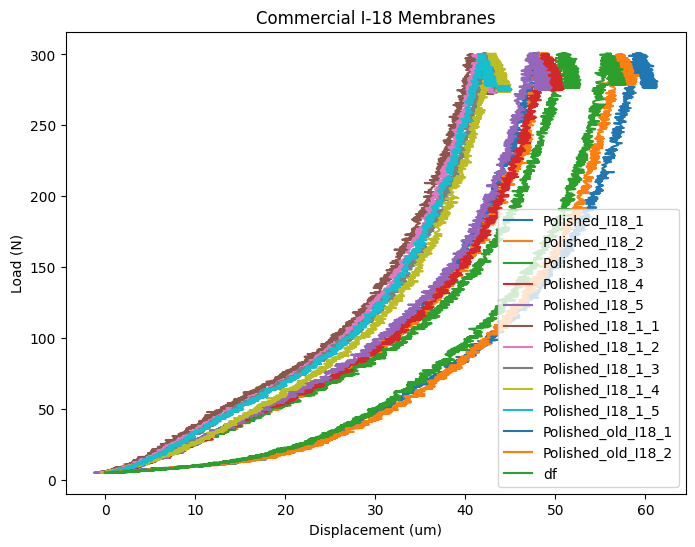

In [31]:
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 5]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Commercial I-18 Membranes')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='lower right')
plt.show()

# AutoMembrane No Heating

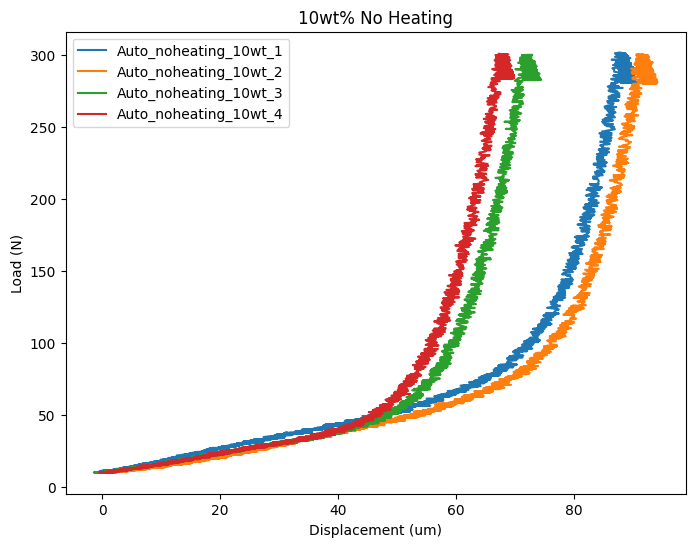

In [32]:
Auto_noheating_10wt_1 = pd.read_csv('Data/Automembrane/AutoNoheat10-1-1_12132023_184312.csv')
Auto_noheating_10wt_2 = pd.read_csv('Data/Automembrane/AutoNoheat10-1-2_12132023_184624.csv')
Auto_noheating_10wt_3 = pd.read_csv('Data/Automembrane/AutoNoheat10-1-3_12132023_184911.csv')
Auto_noheating_10wt_4 = pd.read_csv('Data/Automembrane/AutoNoheat10-1-4_12132023_185155.csv')

# put these into a list
data_list = [Auto_noheating_10wt_1, Auto_noheating_10wt_2, Auto_noheating_10wt_3, Auto_noheating_10wt_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 10]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('10wt% No Heating')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

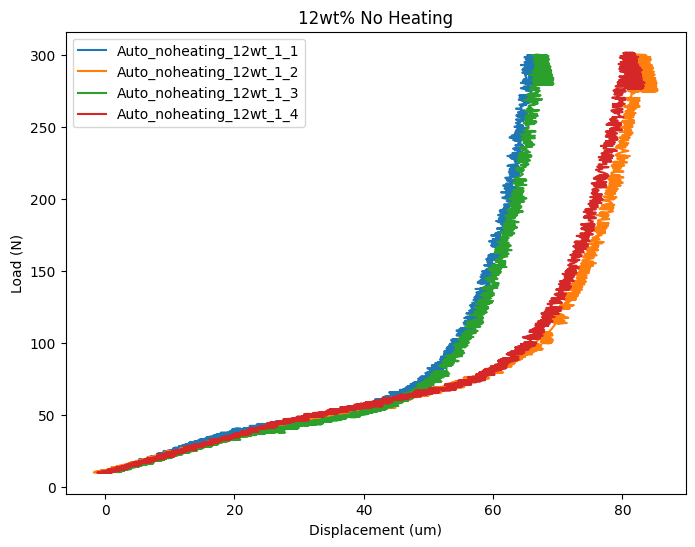

In [33]:
Auto_noheating_12wt_1_1 = pd.read_csv('Data/Automembrane/AutoNoheat12-1-1_12132023_180629.csv')
Auto_noheating_12wt_1_2 = pd.read_csv('Data/Automembrane/AutoNoheat12-1-2_12132023_180947.csv')
Auto_noheating_12wt_1_3 = pd.read_csv('Data/Automembrane/AutoNoheat12-1-3_12132023_181314.csv')
Auto_noheating_12wt_1_4 = pd.read_csv('Data/Automembrane/AutoNoheat12-1-4_12132023_181753.csv')

# put these into a list
data_list = [Auto_noheating_12wt_1_1, Auto_noheating_12wt_1_2, Auto_noheating_12wt_1_3, Auto_noheating_12wt_1_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 10]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('12wt% No Heating')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

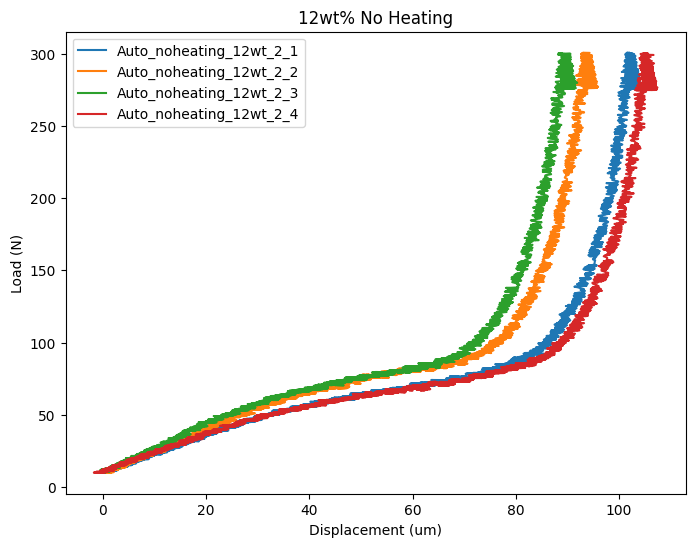

In [34]:
Auto_noheating_12wt_2_1 = pd.read_csv('Data/Automembrane/AutoNoheat12-2-1_12132023_182727.csv')
Auto_noheating_12wt_2_2 = pd.read_csv('Data/Automembrane/AutoNoheat12-2-2_12132023_183111.csv')
Auto_noheating_12wt_2_3 = pd.read_csv('Data/Automembrane/AutoNoheat12-2-3_12132023_183350.csv')
Auto_noheating_12wt_2_4 = pd.read_csv('Data/Automembrane/AutoNoheat12-2-4_12132023_183653.csv')

# put these into a list
data_list = [Auto_noheating_12wt_2_1, Auto_noheating_12wt_2_2, Auto_noheating_12wt_2_3, Auto_noheating_12wt_2_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 10]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('12wt% No Heating')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

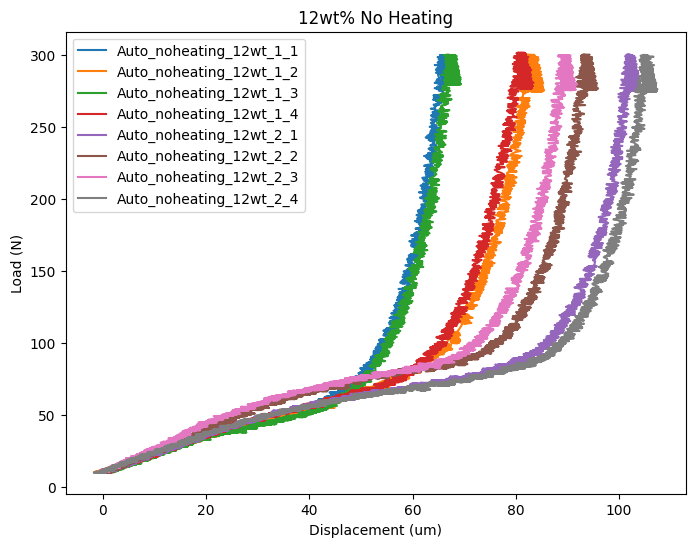

In [35]:
data_list = [Auto_noheating_12wt_1_1, Auto_noheating_12wt_1_2, Auto_noheating_12wt_1_3, Auto_noheating_12wt_1_4, Auto_noheating_12wt_2_1, Auto_noheating_12wt_2_2, Auto_noheating_12wt_2_3, Auto_noheating_12wt_2_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 10]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('12wt% No Heating')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

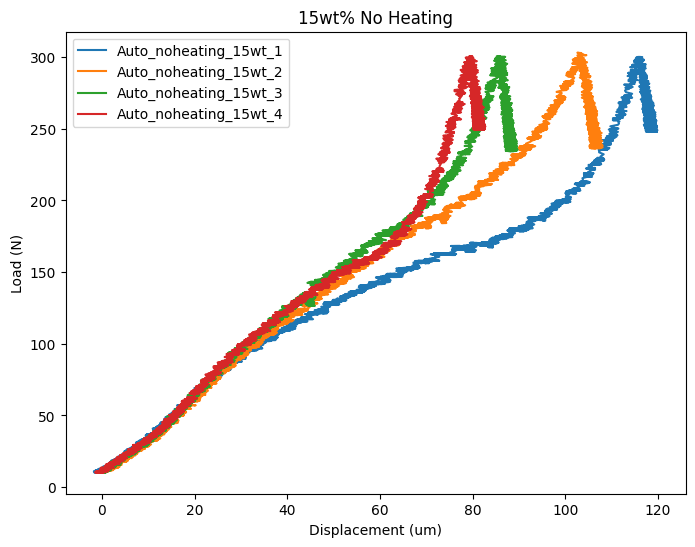

In [36]:
Auto_noheating_15wt_1 = pd.read_csv('Data/Automembrane/AutoNoheat15-1-1_12132023_185751.csv')
Auto_noheating_15wt_2 = pd.read_csv('Data/Automembrane/AutoNoheat15-1-2_12132023_190025.csv')
Auto_noheating_15wt_3 = pd.read_csv('Data/Automembrane/AutoNoheat15-1-3_12132023_190242.csv')
Auto_noheating_15wt_4 = pd.read_csv('Data/Automembrane/AutoNoheat15-1-4_12132023_190508.csv')

# put these into a list
data_list = [Auto_noheating_15wt_1, Auto_noheating_15wt_2, Auto_noheating_15wt_3, Auto_noheating_15wt_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 10]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('15wt% No Heating')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

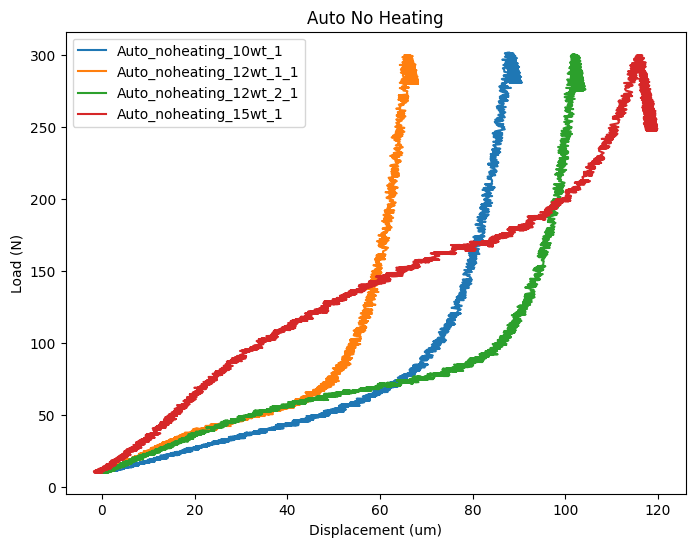

In [37]:
data_list=[Auto_noheating_10wt_1,Auto_noheating_12wt_1_1,Auto_noheating_12wt_2_1, Auto_noheating_15wt_1]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 10]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Auto No Heating')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

# AutoMembrane Heating

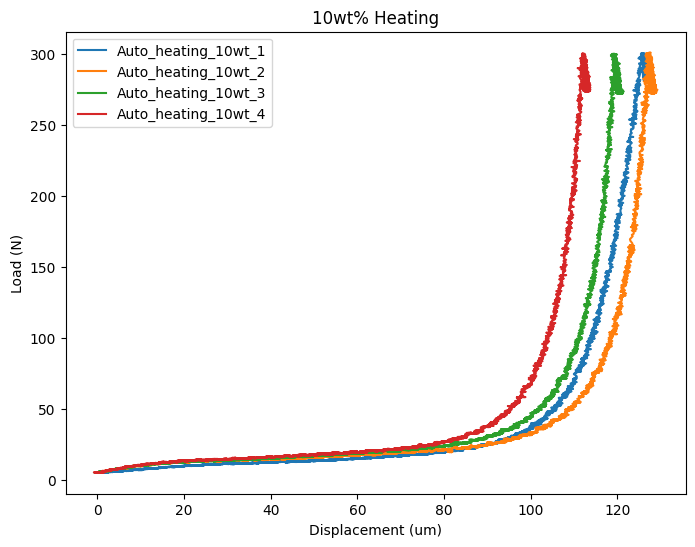

In [38]:
Auto_heating_10wt_1 = pd.read_csv('Data/Automembrane/AutoHeating-10wt-1-1_12152023_180149.csv')
Auto_heating_10wt_2 = pd.read_csv('Data/Automembrane/AutoHeating-10wt-1-2_12152023_180445.csv')
Auto_heating_10wt_3 = pd.read_csv('Data/Automembrane/AutoHeating-10wt-1-3_12152023_180733.csv')
Auto_heating_10wt_4 = pd.read_csv('Data/Automembrane/AutoHeating-10wt-1-4_12152023_181010.csv')

# put these into a list
data_list = [Auto_heating_10wt_1, Auto_heating_10wt_2, Auto_heating_10wt_3, Auto_heating_10wt_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 5]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('10wt% Heating')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

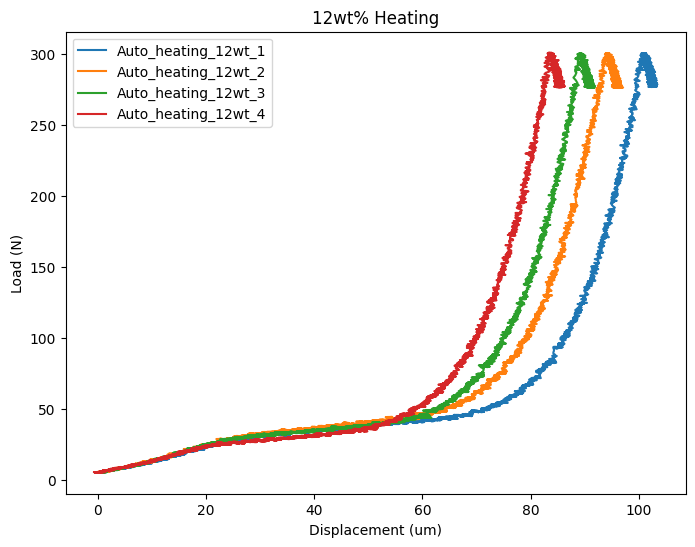

In [39]:
Auto_heating_12wt_1 = pd.read_csv('Data/Automembrane/AutoHeating-12wt-1-1_12152023_174451.csv')
Auto_heating_12wt_2 = pd.read_csv('Data/Automembrane/AutoHeating-12wt-1-2_12152023_174720.csv')
Auto_heating_12wt_3 = pd.read_csv('Data/Automembrane/AutoHeating-12wt-1-3_12152023_175002.csv')
Auto_heating_12wt_4 = pd.read_csv('Data/Automembrane/AutoHeating-12wt-1-4_12152023_175315.csv')

# put these into a list
data_list = [Auto_heating_12wt_1, Auto_heating_12wt_2, Auto_heating_12wt_3, Auto_heating_12wt_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 5]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('12wt% Heating')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

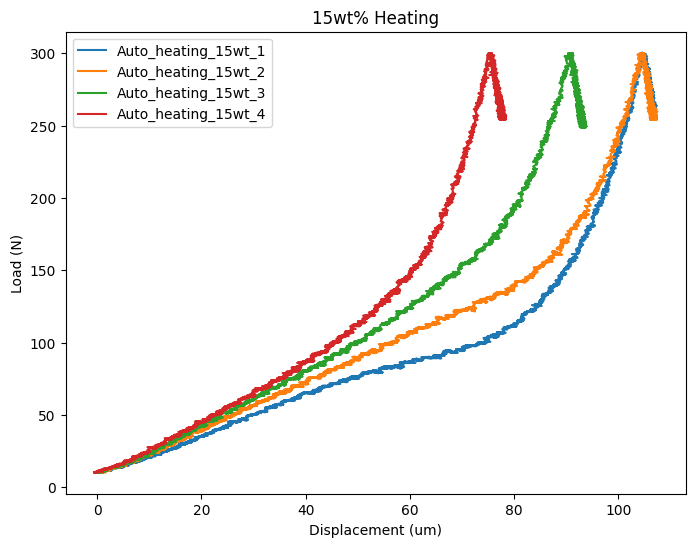

In [40]:
Auto_heating_15wt_1 = pd.read_csv('Data/Automembrane/AutoHeating-15wt-1-1_12152023_164942.csv')
Auto_heating_15wt_2 = pd.read_csv('Data/Automembrane/AutoHeating-15wt-1-2_12152023_165240.csv')
Auto_heating_15wt_3 = pd.read_csv('Data/Automembrane/AutoHeating-15wt-1-3_12152023_165505.csv')
Auto_heating_15wt_4 = pd.read_csv('Data/Automembrane/AutoHeating-15wt-1-4_12152023_165728.csv')

# put these into a list
data_list = [Auto_heating_15wt_1, Auto_heating_15wt_2, Auto_heating_15wt_3, Auto_heating_15wt_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 10]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('15wt% Heating')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

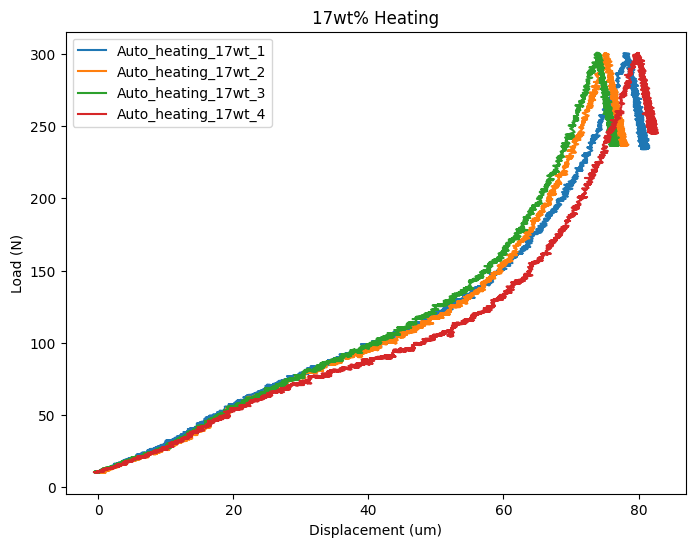

In [41]:
Auto_heating_17wt_1 = pd.read_csv('Data/Automembrane/AutoHeating-17wt-1-1_12152023_163238.csv')
Auto_heating_17wt_2 = pd.read_csv('Data/Automembrane/AutoHeating-17wt-1-2_12152023_163546.csv')
Auto_heating_17wt_3 = pd.read_csv('Data/Automembrane/AutoHeating-17wt-1-3_12152023_163810.csv')
Auto_heating_17wt_4 = pd.read_csv('Data/Automembrane/AutoHeating-17wt-1-4_12152023_164019.csv')

# put these into a list
data_list = [Auto_heating_17wt_1, Auto_heating_17wt_2, Auto_heating_17wt_3, Auto_heating_17wt_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 10]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('17wt% Heating')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

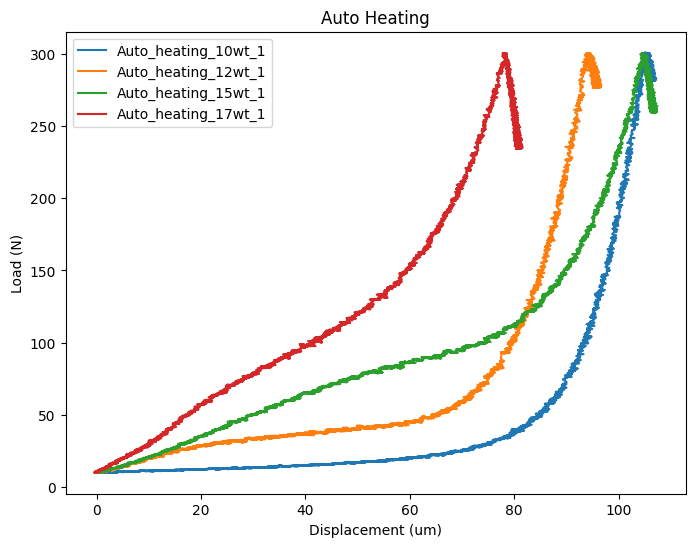

In [42]:
data_list = [Auto_heating_10wt_1, Auto_heating_12wt_1, Auto_heating_15wt_1, Auto_heating_17wt_1]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 10]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Auto Heating')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

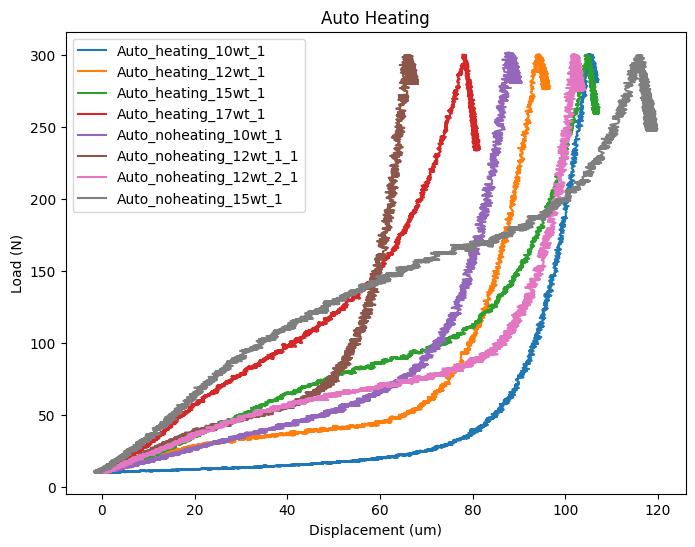

In [43]:
data_list = [Auto_heating_10wt_1, Auto_heating_12wt_1, Auto_heating_15wt_1, Auto_heating_17wt_1, Auto_noheating_10wt_1, Auto_noheating_12wt_1_1, Auto_noheating_12wt_2_1, Auto_noheating_15wt_1]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 10]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Auto Heating')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

# No heating sample 2

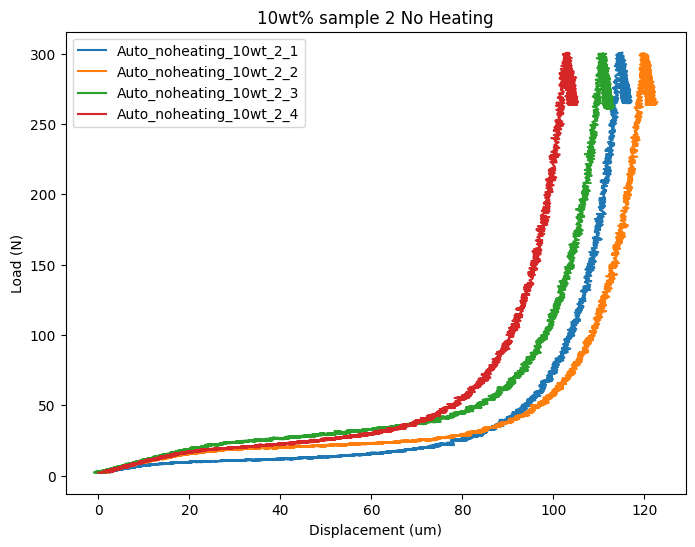

In [44]:
Auto_noheating_10wt_2_1 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-10-2-1-240201_02012024_190744.csv')
Auto_noheating_10wt_2_2 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-10-2-2-240201_02012024_191026.csv')
Auto_noheating_10wt_2_3 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-10-2-3-240201_02012024_191401.csv')
Auto_noheating_10wt_2_4 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-10-2-4-240201_02012024_191648.csv')

data_list = [Auto_noheating_10wt_2_1, Auto_noheating_10wt_2_2, Auto_noheating_10wt_2_3, Auto_noheating_10wt_2_4]
    
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('10wt% sample 2 No Heating')
#plt.xlim(0,20)
#plt.ylim(0,50)
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

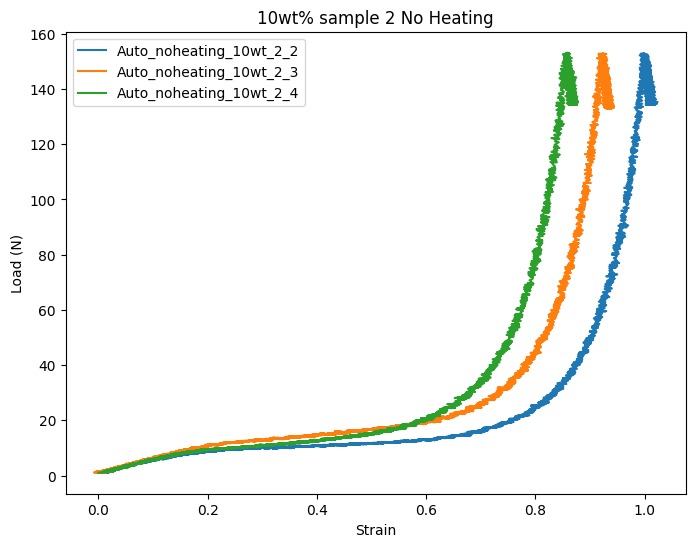

In [45]:
#Auto_heating_10wt_2_1 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-10-2-1-240201_02012024_190744.csv')
Auto_noheating_10wt_2_2 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-10-2-2-240201_02012024_191026.csv')
Auto_noheating_10wt_2_3 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-10-2-3-240201_02012024_191401.csv')
Auto_noheating_10wt_2_4 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-10-2-4-240201_02012024_191648.csv')

# put these into a list
data_list = [Auto_noheating_10wt_2_2, Auto_noheating_10wt_2_3, Auto_noheating_10wt_2_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

thickness = [120,120,120]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('10wt% sample 2 No Heating')
#plt.xlim(0,0.1)
#plt.ylim(0,10)
plt.xlabel('Strain')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

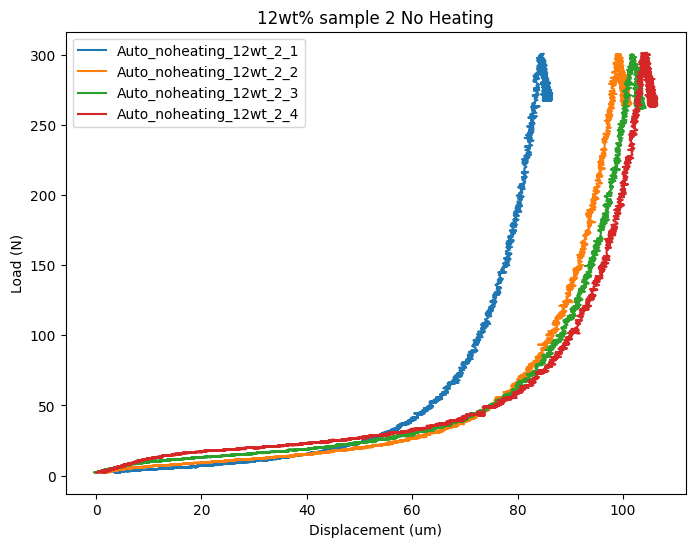

In [46]:
Auto_noheating_12wt_2_1 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-12-2-1-240201_02012024_183453.csv')
Auto_noheating_12wt_2_2 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-12-2-2-240201_02012024_183730.csv')
Auto_noheating_12wt_2_3 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-12-2-3-240201_02012024_184035.csv')
Auto_noheating_12wt_2_4 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-12-2-4-240201_02012024_184313.csv')

data_list = [Auto_noheating_12wt_2_1, Auto_noheating_12wt_2_2, Auto_noheating_12wt_2_3, Auto_noheating_12wt_2_4]
    
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('12wt% sample 2 No Heating')
#plt.xlim(0,30)
#plt.ylim(0,50)
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

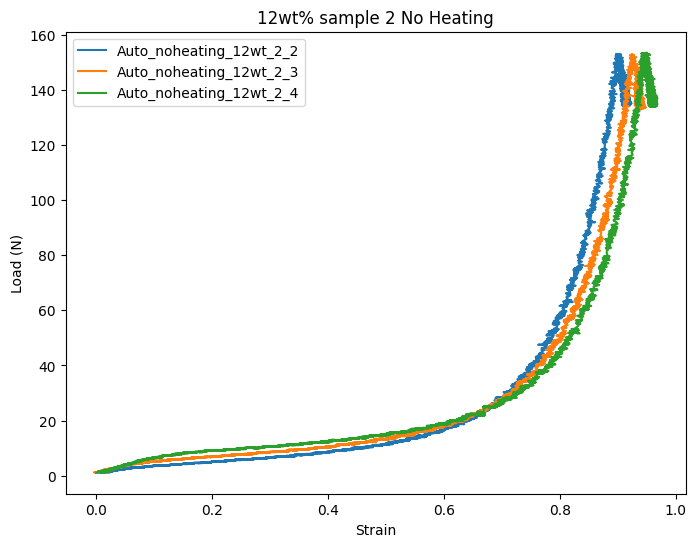

In [47]:
#Auto_noheating_12wt_2_1 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-12-2-1-240201_02012024_183453.csv')
Auto_noheating_12wt_2_2 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-12-2-2-240201_02012024_183730.csv')
Auto_noheating_12wt_2_3 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-12-2-3-240201_02012024_184035.csv')
Auto_noheating_12wt_2_4 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-12-2-4-240201_02012024_184313.csv')

data_list = [Auto_noheating_12wt_2_2, Auto_noheating_12wt_2_3, Auto_noheating_12wt_2_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

thickness = [110,110,110]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('12wt% sample 2 No Heating')
#plt.xlim(0,0.1)
#plt.ylim(0,10)
plt.xlabel('Strain')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

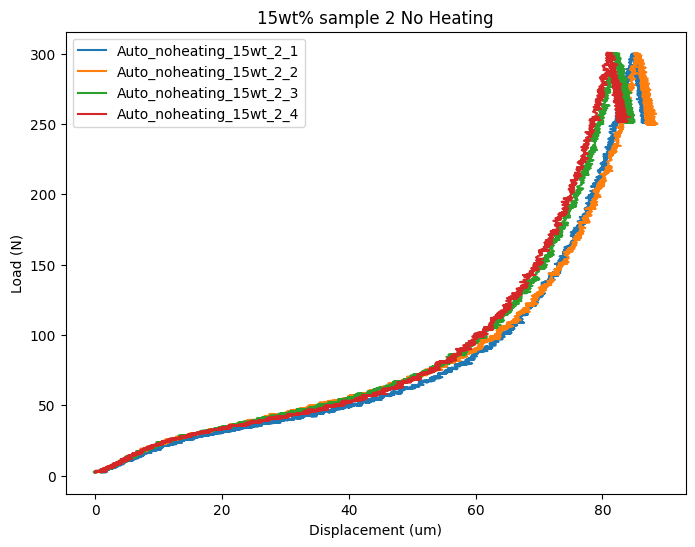

In [48]:
Auto_noheating_15wt_2_1 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-15-2-1-240201_02012024_181434.csv')
Auto_noheating_15wt_2_2 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-15-2-2-240201_02012024_181804.csv')
Auto_noheating_15wt_2_3 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-15-2-3-240201_02012024_182043.csv')
Auto_noheating_15wt_2_4 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-15-2-4-240201_02012024_182359.csv')

data_list = [Auto_noheating_15wt_2_1, Auto_noheating_15wt_2_2, Auto_noheating_15wt_2_3, Auto_noheating_15wt_2_4]
    
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('15wt% sample 2 No Heating')
#plt.xlim(0,20)
#plt.ylim(0,30)
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

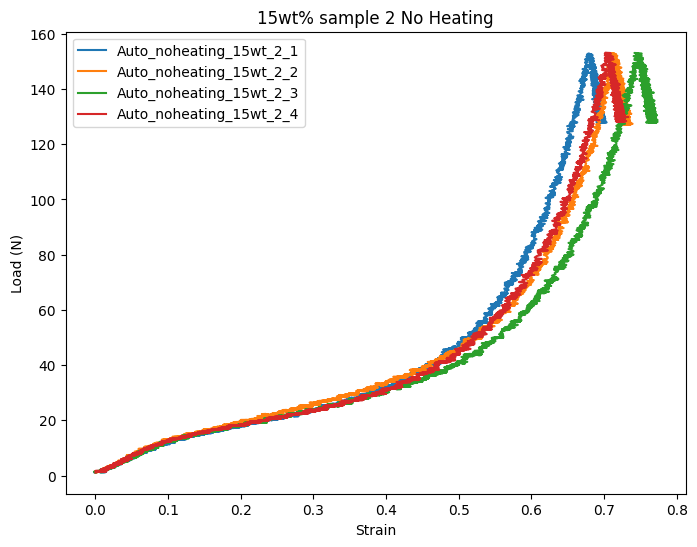

In [49]:
Auto_noheating_15wt_2_1 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-15-2-1-240201_02012024_181434.csv')
Auto_noheating_15wt_2_2 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-15-2-2-240201_02012024_181804.csv')
Auto_noheating_15wt_2_3 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-15-2-3-240201_02012024_182043.csv')
Auto_noheating_15wt_2_4 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-15-2-4-240201_02012024_182359.csv')

data_list = [Auto_noheating_15wt_2_1, Auto_noheating_15wt_2_2, Auto_noheating_15wt_2_3, Auto_noheating_15wt_2_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

thickness = [125,120,110,115]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('15wt% sample 2 No Heating')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

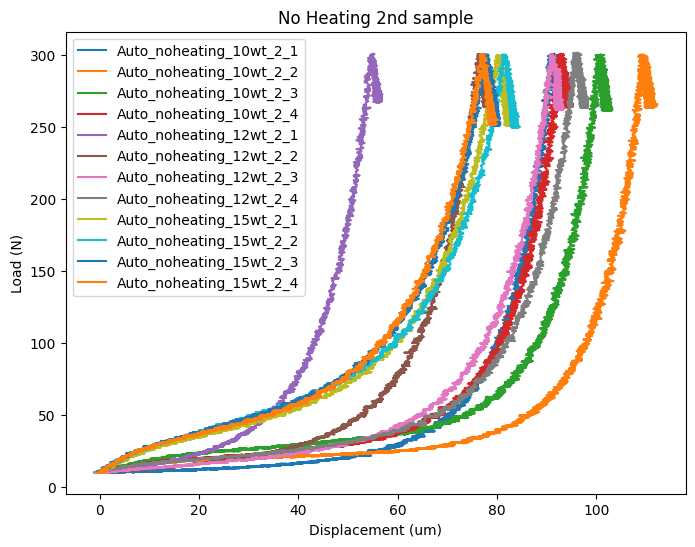

In [50]:
Auto_noheating_10wt_2_1 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-10-2-1-240201_02012024_190744.csv')
Auto_noheating_10wt_2_2 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-10-2-2-240201_02012024_191026.csv')
Auto_noheating_10wt_2_3 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-10-2-3-240201_02012024_191401.csv')
Auto_noheating_10wt_2_4 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-10-2-4-240201_02012024_191648.csv')
Auto_noheating_12wt_2_1 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-12-2-1-240201_02012024_183453.csv')
Auto_noheating_12wt_2_2 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-12-2-2-240201_02012024_183730.csv')
Auto_noheating_12wt_2_3 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-12-2-3-240201_02012024_184035.csv')
Auto_noheating_12wt_2_4 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-12-2-4-240201_02012024_184313.csv')
Auto_noheating_15wt_2_1 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-15-2-1-240201_02012024_181434.csv')
Auto_noheating_15wt_2_2 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-15-2-2-240201_02012024_181804.csv')
Auto_noheating_15wt_2_3 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-15-2-3-240201_02012024_182043.csv')
Auto_noheating_15wt_2_4 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-15-2-4-240201_02012024_182359.csv')

data_list = [Auto_noheating_10wt_2_1, Auto_noheating_10wt_2_2, Auto_noheating_10wt_2_3, Auto_noheating_10wt_2_4, Auto_noheating_12wt_2_1, Auto_noheating_12wt_2_2, Auto_noheating_12wt_2_3, Auto_noheating_12wt_2_4, Auto_noheating_15wt_2_1, Auto_noheating_15wt_2_2, Auto_noheating_15wt_2_3, Auto_noheating_15wt_2_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 10]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('No Heating 2nd sample')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

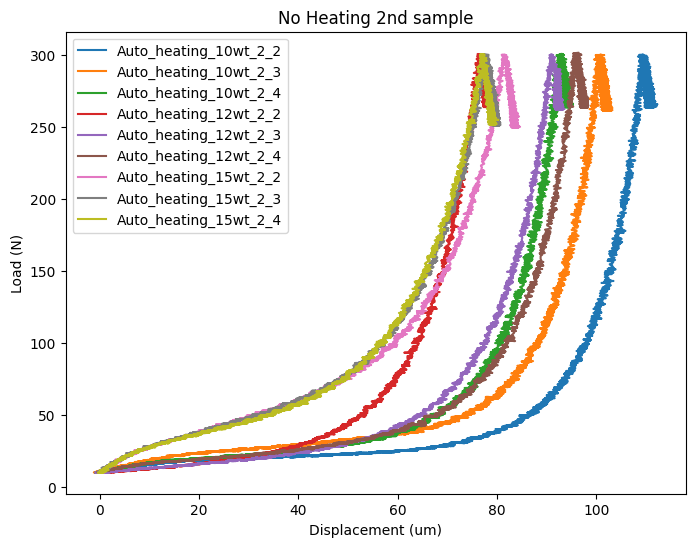

In [51]:
#Auto_heating_10wt_2_1 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-10-2-1-240201_02012024_190744.csv')
Auto_heating_10wt_2_2 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-10-2-2-240201_02012024_191026.csv')
Auto_heating_10wt_2_3 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-10-2-3-240201_02012024_191401.csv')
Auto_heating_10wt_2_4 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-10-2-4-240201_02012024_191648.csv')
#Auto_heating_12wt_2_1 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-12-2-1-240201_02012024_183453.csv')
Auto_heating_12wt_2_2 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-12-2-2-240201_02012024_183730.csv')
Auto_heating_12wt_2_3 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-12-2-3-240201_02012024_184035.csv')
Auto_heating_12wt_2_4 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-12-2-4-240201_02012024_184313.csv')
Auto_heating_15wt_2_1 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-15-2-1-240201_02012024_181434.csv')
Auto_heating_15wt_2_2 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-15-2-2-240201_02012024_181804.csv')
Auto_heating_15wt_2_3 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-15-2-3-240201_02012024_182043.csv')
Auto_heating_15wt_2_4 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-15-2-4-240201_02012024_182359.csv')

data_list = [Auto_heating_10wt_2_2, Auto_heating_10wt_2_3, Auto_heating_10wt_2_4, Auto_heating_12wt_2_2, Auto_heating_12wt_2_3, Auto_heating_12wt_2_4, Auto_heating_15wt_2_2, Auto_heating_15wt_2_3, Auto_heating_15wt_2_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 10]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('No Heating 2nd sample')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

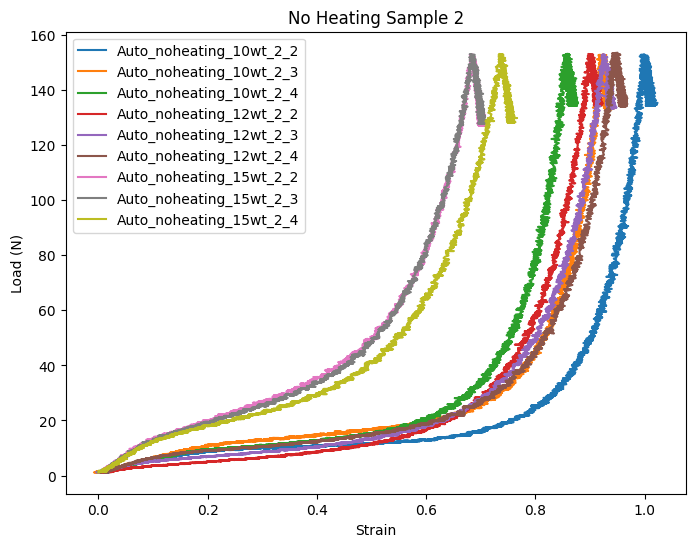

In [52]:
#Auto_noheating_10wt_2_1 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-10-2-1-240201_02012024_190744.csv')
Auto_noheating_10wt_2_2 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-10-2-2-240201_02012024_191026.csv')
Auto_noheating_10wt_2_3 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-10-2-3-240201_02012024_191401.csv')
Auto_noheating_10wt_2_4 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-10-2-4-240201_02012024_191648.csv')
#Auto_noheating_12wt_2_1 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-12-2-1-240201_02012024_183453.csv')
Auto_noheating_12wt_2_2 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-12-2-2-240201_02012024_183730.csv')
Auto_noheating_12wt_2_3 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-12-2-3-240201_02012024_184035.csv')
Auto_noheating_12wt_2_4 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-12-2-4-240201_02012024_184313.csv')
Auto_noheating_15wt_2_1 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-15-2-1-240201_02012024_181434.csv')
Auto_noheating_15wt_2_2 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-15-2-2-240201_02012024_181804.csv')
Auto_noheating_15wt_2_3 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-15-2-3-240201_02012024_182043.csv')
Auto_noheating_15wt_2_4 = pd.read_csv('Data/compression sample NH 10,12,15/AutoNoheating-15-2-4-240201_02012024_182359.csv')

data_list = [Auto_noheating_10wt_2_2, Auto_noheating_10wt_2_3, Auto_noheating_10wt_2_4, Auto_noheating_12wt_2_2, Auto_noheating_12wt_2_3, Auto_noheating_12wt_2_4, Auto_noheating_15wt_2_2, Auto_noheating_15wt_2_3, Auto_noheating_15wt_2_4]
    
thickness = [120,120,120,110,110,110,125,120,110,115]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('No Heating Sample 2')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

# Automembrane Batch 3

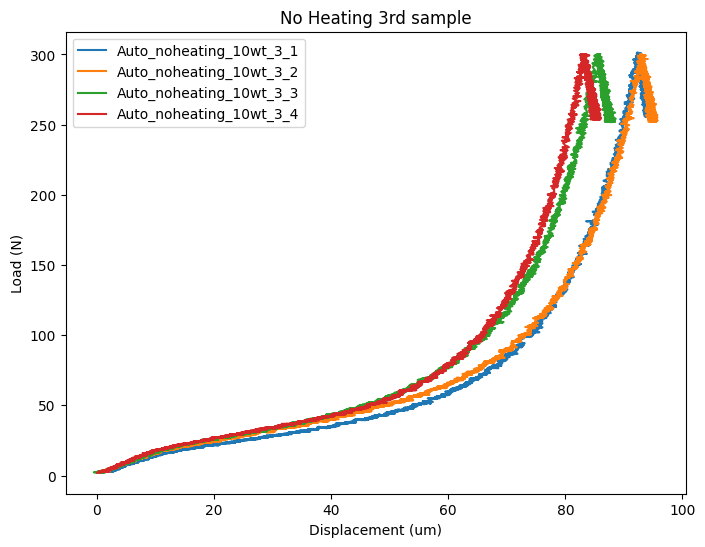

In [53]:
Auto_noheating_10wt_3_1 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-10-3-1-240212_02122024_160514.csv')
Auto_noheating_10wt_3_2 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-10-3-2-240212_02122024_160815.csv')
Auto_noheating_10wt_3_3 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-10-3-3-240212_02122024_161038.csv')
Auto_noheating_10wt_3_4 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-10-3-4-240212_02122024_161307.csv')

data_list = [Auto_noheating_10wt_3_1, Auto_noheating_10wt_3_2, Auto_noheating_10wt_3_3, Auto_noheating_10wt_3_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('No Heating 3rd sample')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

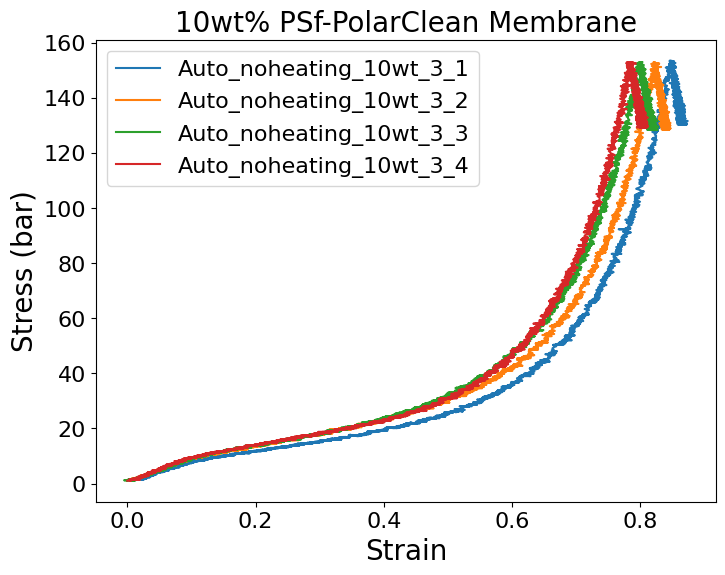

In [54]:
Auto_noheating_10wt_3_1 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-10-3-1-240212_02122024_160514.csv')
Auto_noheating_10wt_3_2 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-10-3-2-240212_02122024_160815.csv')
Auto_noheating_10wt_3_3 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-10-3-3-240212_02122024_161038.csv')
Auto_noheating_10wt_3_4 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-10-3-4-240212_02122024_161307.csv')

data_list = [Auto_noheating_10wt_3_1, Auto_noheating_10wt_3_2, Auto_noheating_10wt_3_3, Auto_noheating_10wt_3_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

thickness = [109,113,107,106]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('10wt% PSf-PolarClean Membrane', fontsize=20)
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain', fontsize=20)
plt.ylabel('Stress (bar)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.show() 

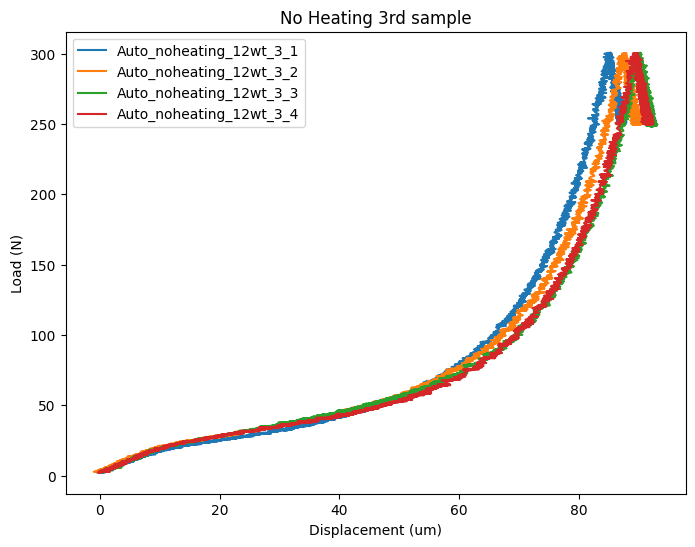

In [55]:
Auto_noheating_12wt_3_1 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-12-3-1-240212_02122024_161808.csv')
Auto_noheating_12wt_3_2 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-12-3-2-240212_02122024_162105.csv')
Auto_noheating_12wt_3_3 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-12-3-3-240212_02122024_162358.csv')
Auto_noheating_12wt_3_4 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-12-3-4-240212_02122024_162658.csv')

data_list = [Auto_noheating_12wt_3_1, Auto_noheating_12wt_3_2, Auto_noheating_12wt_3_3, Auto_noheating_12wt_3_4]
    
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('No Heating 3rd sample')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

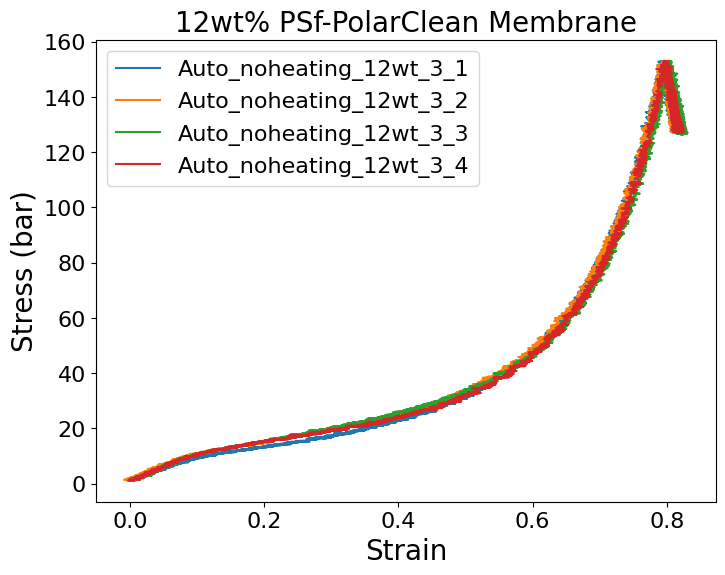

In [56]:
Auto_noheating_12wt_3_1 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-12-3-1-240212_02122024_161808.csv')
Auto_noheating_12wt_3_2 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-12-3-2-240212_02122024_162105.csv')
Auto_noheating_12wt_3_3 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-12-3-3-240212_02122024_162358.csv')
Auto_noheating_12wt_3_4 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-12-3-4-240212_02122024_162658.csv')

data_list = [Auto_noheating_12wt_3_1, Auto_noheating_12wt_3_2, Auto_noheating_12wt_3_3, Auto_noheating_12wt_3_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

thickness = [107,110,112,112]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('12wt% PSf-PolarClean Membrane', fontsize=20)
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain', fontsize=20)
plt.ylabel('Stress (bar)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.show() 

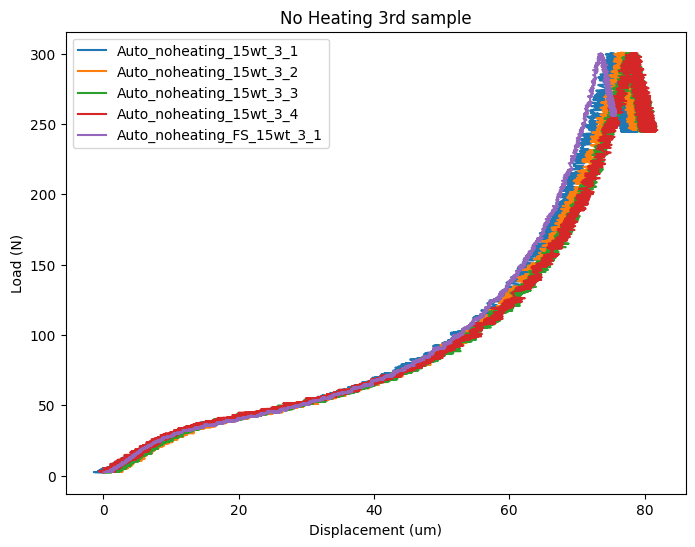

In [57]:
Auto_noheating_15wt_3_1 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-15-3-1-240212_02122024_175519.csv')
Auto_noheating_15wt_3_2 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-15-3-2-240212_02122024_175755.csv')
Auto_noheating_15wt_3_3 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-15-3-3-240212_02122024_180046.csv')
Auto_noheating_15wt_3_4 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-15-3-4-240212_02122024_180316.csv')
Auto_noheating_FS_15wt_3_1 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheatingFS-15-3-1-240215_02152024_162737.csv')
#Auto_noheating_15wt_3_5 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-15-3-5-240215_02152024_163226.csv')

data_list = [Auto_noheating_15wt_3_1, Auto_noheating_15wt_3_2, Auto_noheating_15wt_3_3, Auto_noheating_15wt_3_4, Auto_noheating_FS_15wt_3_1]#, Auto_noheating_15wt_3_5]


# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('No Heating 3rd sample')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

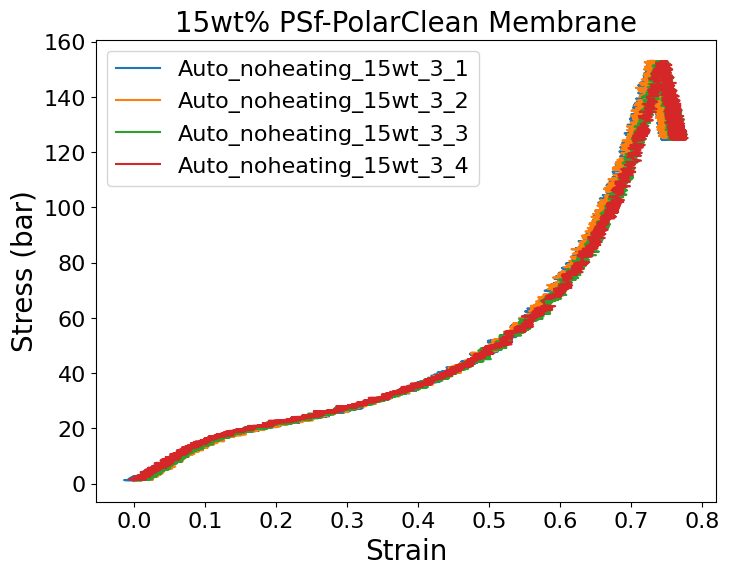

In [58]:
Auto_noheating_15wt_3_1 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-15-3-1-240212_02122024_175519.csv')
Auto_noheating_15wt_3_2 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-15-3-2-240212_02122024_175755.csv')
Auto_noheating_15wt_3_3 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-15-3-3-240212_02122024_180046.csv')
Auto_noheating_15wt_3_4 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-15-3-4-240212_02122024_180316.csv')
Auto_noheating_FS_15wt_3_1 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheatingFS-15-3-1-240215_02152024_162737.csv')
#Auto_noheating_15wt_3_5 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-15-3-5-240215_02152024_163226.csv')

data_list = [Auto_noheating_15wt_3_1, Auto_noheating_15wt_3_2, Auto_noheating_15wt_3_3, Auto_noheating_15wt_3_4]#, Auto_noheating_FS_15wt_3_1]#, Auto_noheating_15wt_3_5]

# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

thickness = [103,105,105,105,105]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('15wt% PSf-PolarClean Membrane', fontsize=20)
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain', fontsize=20)
plt.ylabel('Stress (bar)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.show() 

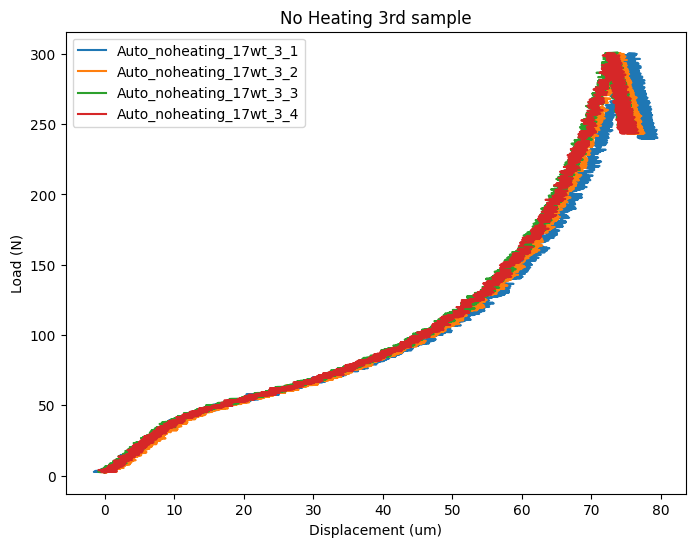

In [59]:
Auto_noheating_17wt_3_1 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-17-3-1-240212_02122024_180801.csv')
Auto_noheating_17wt_3_2 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-17-3-2-240212_02122024_181028.csv')
Auto_noheating_17wt_3_3 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-17-3-3-240212_02122024_181307.csv')
Auto_noheating_17wt_3_4 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-17-3-4-240212_02122024_181657.csv')

data_list = [Auto_noheating_17wt_3_1, Auto_noheating_17wt_3_2, Auto_noheating_17wt_3_3, Auto_noheating_17wt_3_4]

# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('No Heating 3rd sample')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

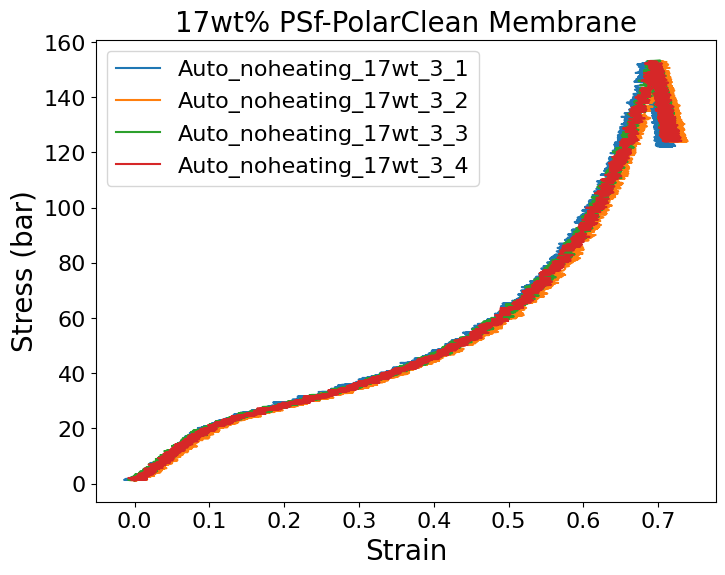

In [60]:
Auto_noheating_17wt_3_1 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-17-3-1-240212_02122024_180801.csv')
Auto_noheating_17wt_3_2 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-17-3-2-240212_02122024_181028.csv')
Auto_noheating_17wt_3_3 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-17-3-3-240212_02122024_181307.csv')
Auto_noheating_17wt_3_4 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-17-3-4-240212_02122024_181657.csv')

data_list = [Auto_noheating_17wt_3_1, Auto_noheating_17wt_3_2, Auto_noheating_17wt_3_3, Auto_noheating_17wt_3_4]


# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

thickness = [110,105,105,105]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('17wt% PSf-PolarClean Membrane', fontsize=20)
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain', fontsize=20)
plt.ylabel('Stress (bar)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.show() 

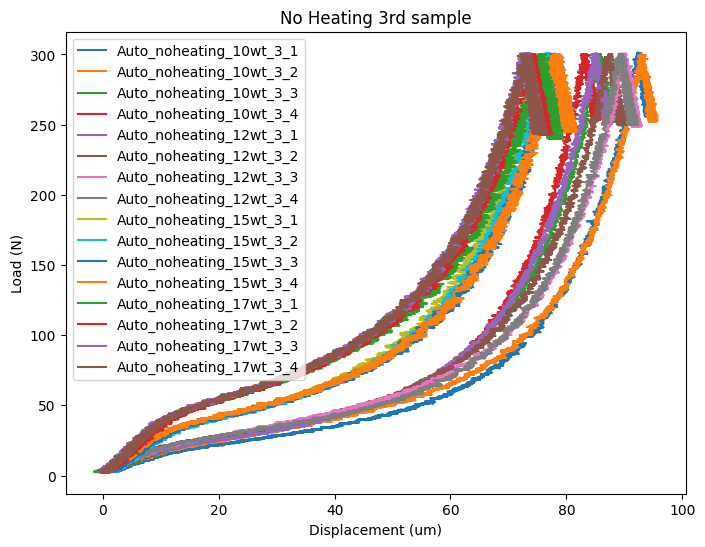

In [61]:
data_list = [Auto_noheating_10wt_3_1, Auto_noheating_10wt_3_2, Auto_noheating_10wt_3_3, Auto_noheating_10wt_3_4, Auto_noheating_12wt_3_1, Auto_noheating_12wt_3_2, Auto_noheating_12wt_3_3, Auto_noheating_12wt_3_4, Auto_noheating_15wt_3_1, Auto_noheating_15wt_3_2, Auto_noheating_15wt_3_3, Auto_noheating_15wt_3_4, Auto_noheating_17wt_3_1, Auto_noheating_17wt_3_2, Auto_noheating_17wt_3_3, Auto_noheating_17wt_3_4]

# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('No Heating 3rd sample')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

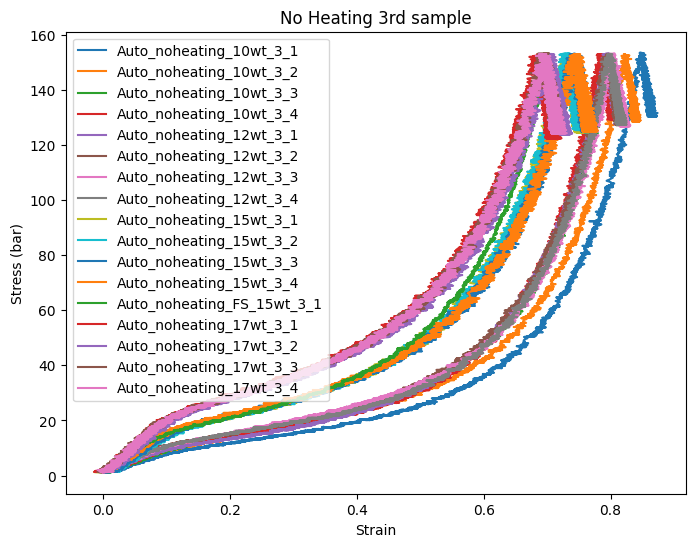

In [62]:
data_list = [Auto_noheating_10wt_3_1, Auto_noheating_10wt_3_2, Auto_noheating_10wt_3_3, Auto_noheating_10wt_3_4, Auto_noheating_12wt_3_1, Auto_noheating_12wt_3_2, Auto_noheating_12wt_3_3, Auto_noheating_12wt_3_4, Auto_noheating_15wt_3_1, Auto_noheating_15wt_3_2, Auto_noheating_15wt_3_3, Auto_noheating_15wt_3_4, Auto_noheating_FS_15wt_3_1, Auto_noheating_17wt_3_1, Auto_noheating_17wt_3_2, Auto_noheating_17wt_3_3, Auto_noheating_17wt_3_4]

# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

thickness = [109,113,107,106,107,110,112,112,103,105,105,105,105,110,105,105,105]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('No Heating 3rd sample')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

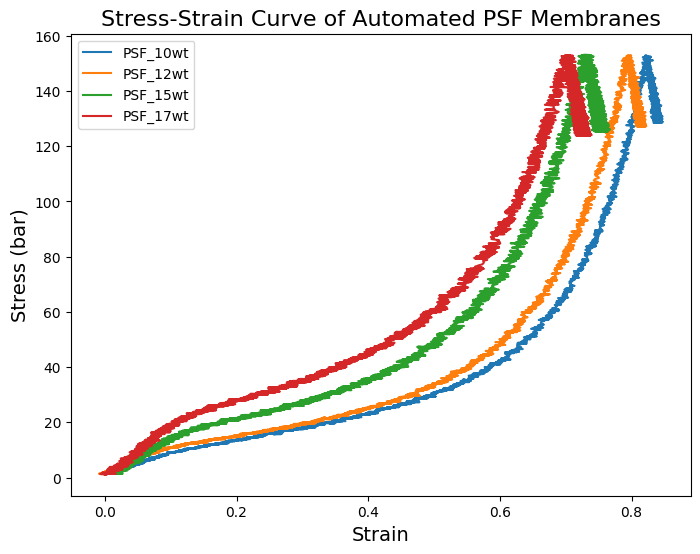

In [63]:
PSF_10wt = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-10-3-2-240212_02122024_160815.csv')
PSF_12wt = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-12-3-2-240212_02122024_162105.csv')
PSF_15wt = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-15-3-2-240212_02122024_175755.csv')
PSF_17wt = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-17-3-2-240212_02122024_181028.csv')
data_list = [PSF_10wt, PSF_12wt, PSF_15wt, PSF_17wt]

# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

thickness = [113,110,105,105]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('Stress-Strain Curve of Automated PSF Membranes', fontsize=16)
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain', fontsize=14)
plt.ylabel('Stress (bar)', fontsize=14)
plt.legend(loc='upper left')
plt.show()  

# Automembrane Batch 4 (overnight)

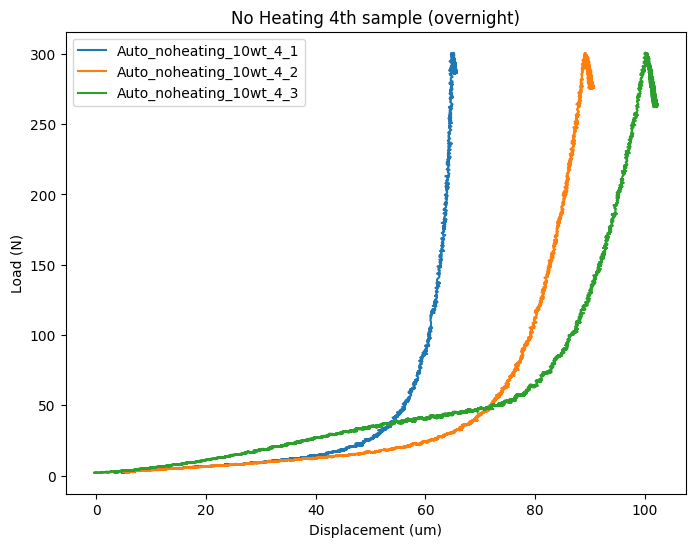

In [64]:
Auto_noheating_10wt_4_1 = pd.read_csv('Data/compression 4/AutoNoheating-10-4-1-240223_02232024_161809.csv')
Auto_noheating_10wt_4_2 = pd.read_csv('Data/compression 4/AutoNoheating-10-4-2-240223_02232024_162119.csv')
Auto_noheating_10wt_4_3 = pd.read_csv('Data/compression 4/AutoNoheating-10-4-3-240223_02232024_162456.csv')

data_list = [Auto_noheating_10wt_4_1, Auto_noheating_10wt_4_2, Auto_noheating_10wt_4_3]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('No Heating 4th sample (overnight)')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

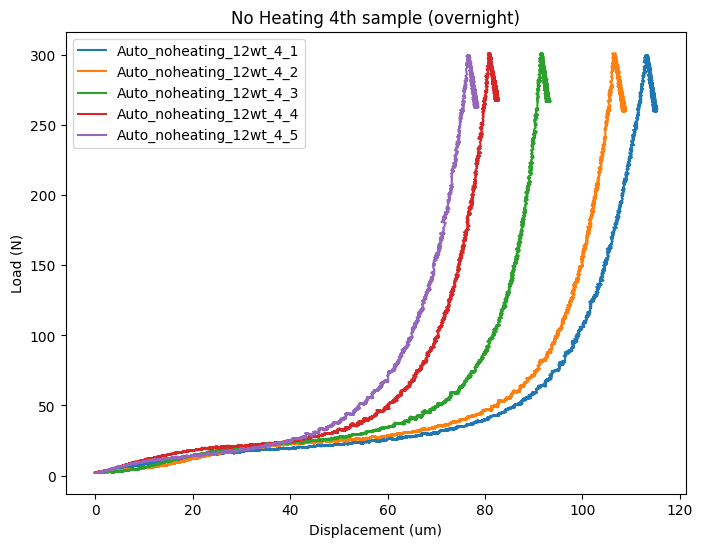

In [65]:
Auto_noheating_12wt_4_1 = pd.read_csv('Data/compression 4/AutoNoheating-12-4-1-240223_02232024_163339.csv')
Auto_noheating_12wt_4_2 = pd.read_csv('Data/compression 4/AutoNoheating-12-4-2-240223_02232024_163631.csv')
Auto_noheating_12wt_4_3 = pd.read_csv('Data/compression 4/AutoNoheating-12-4-3-240223_02232024_163935.csv')
Auto_noheating_12wt_4_4 = pd.read_csv('Data/compression 4/AutoNoheating-12-4-4-240223_02232024_164316.csv')
Auto_noheating_12wt_4_5 = pd.read_csv('Data/compression 4/AutoNoheating-12-4-5-240223_02232024_164618.csv')

data_list = [Auto_noheating_12wt_4_1, Auto_noheating_12wt_4_2, Auto_noheating_12wt_4_3, Auto_noheating_12wt_4_4, Auto_noheating_12wt_4_5]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('No Heating 4th sample (overnight)')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

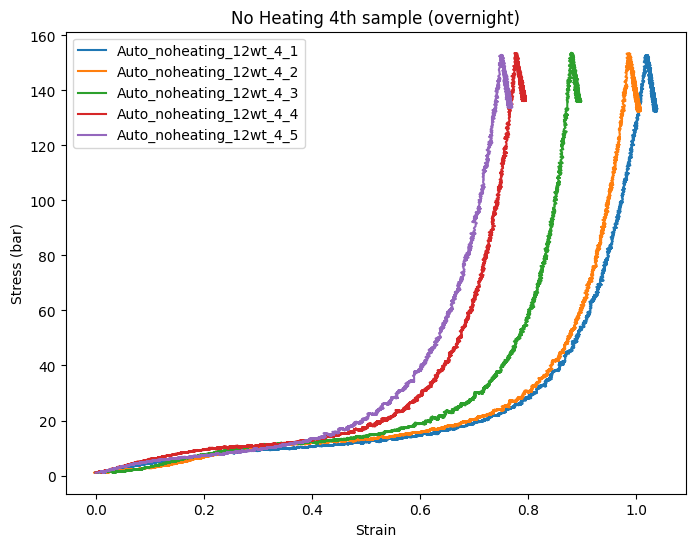

In [66]:
Auto_noheating_12wt_4_1 = pd.read_csv('Data/compression 4/AutoNoheating-12-4-1-240223_02232024_163339.csv')
Auto_noheating_12wt_4_2 = pd.read_csv('Data/compression 4/AutoNoheating-12-4-2-240223_02232024_163631.csv')
Auto_noheating_12wt_4_3 = pd.read_csv('Data/compression 4/AutoNoheating-12-4-3-240223_02232024_163935.csv')
Auto_noheating_12wt_4_4 = pd.read_csv('Data/compression 4/AutoNoheating-12-4-4-240223_02232024_164316.csv')
Auto_noheating_12wt_4_5 = pd.read_csv('Data/compression 4/AutoNoheating-12-4-5-240223_02232024_164618.csv')

data_list = [Auto_noheating_12wt_4_1, Auto_noheating_12wt_4_2, Auto_noheating_12wt_4_3, Auto_noheating_12wt_4_4, Auto_noheating_12wt_4_5]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

thickness = [111,108,104,104,102]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('No Heating 4th sample (overnight)')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

# Automembrane Batch 4 (4 days)

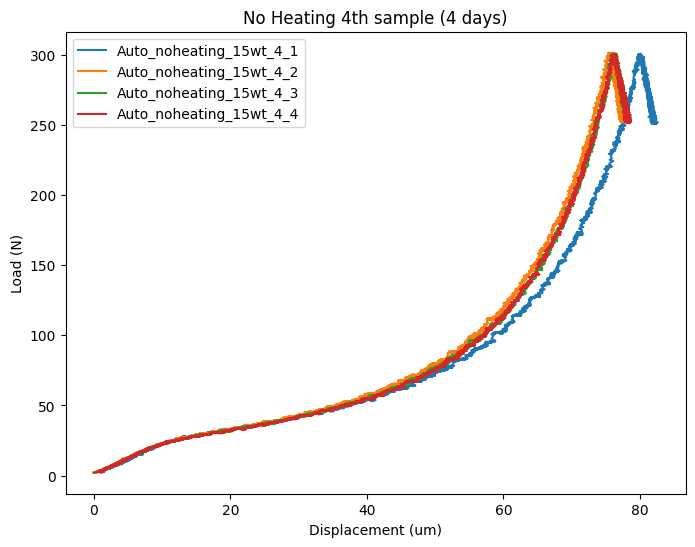

In [67]:
Auto_noheating_15wt_4_1 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-15-4-1-240226_02262024_162514.csv')
Auto_noheating_15wt_4_2 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-15-4-2-240226_02262024_162808.csv')
Auto_noheating_15wt_4_3 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-15-4-3-240226_02262024_163110.csv')
Auto_noheating_15wt_4_4 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-15-4-4-240226_02262024_163353.csv')

data_list = [Auto_noheating_15wt_4_1, Auto_noheating_15wt_4_2, Auto_noheating_15wt_4_3, Auto_noheating_15wt_4_4]

# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('No Heating 4th sample (4 days)')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

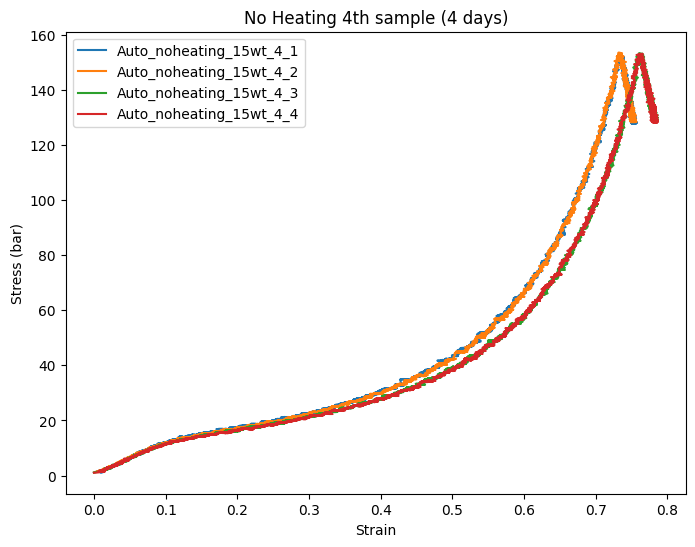

In [68]:
Auto_noheating_15wt_4_1 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-15-4-1-240226_02262024_162514.csv')
Auto_noheating_15wt_4_2 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-15-4-2-240226_02262024_162808.csv')
Auto_noheating_15wt_4_3 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-15-4-3-240226_02262024_163110.csv')
Auto_noheating_15wt_4_4 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-15-4-4-240226_02262024_163353.csv')

data_list = [Auto_noheating_15wt_4_1, Auto_noheating_15wt_4_2, Auto_noheating_15wt_4_3, Auto_noheating_15wt_4_4]

# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

thickness = [109,103,100,100]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('No Heating 4th sample (4 days)')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

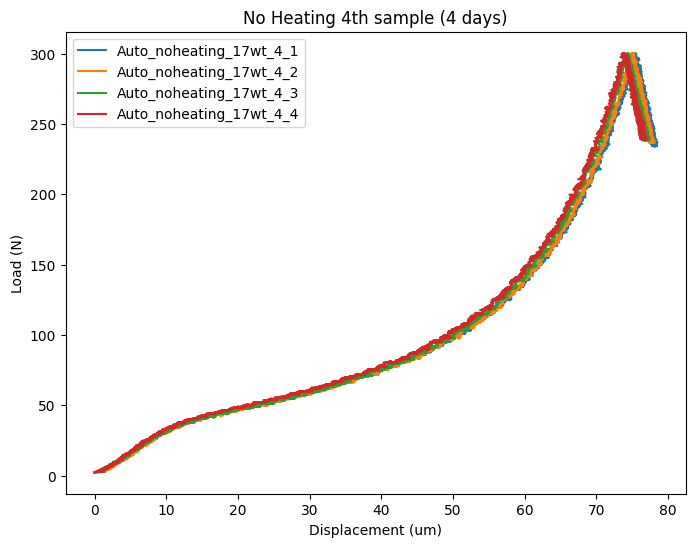

In [69]:
Auto_noheating_17wt_4_1 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-17-4-1-240226_02262024_163853.csv')
Auto_noheating_17wt_4_2 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-17-4-2-240226_02262024_164117.csv')
Auto_noheating_17wt_4_3 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-17-4-3-240226_02262024_164351.csv')
Auto_noheating_17wt_4_4 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-17-4-4-240226_02262024_164621.csv')

data_list = [Auto_noheating_17wt_4_1, Auto_noheating_17wt_4_2, Auto_noheating_17wt_4_3, Auto_noheating_17wt_4_4]

# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('No Heating 4th sample (4 days)')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

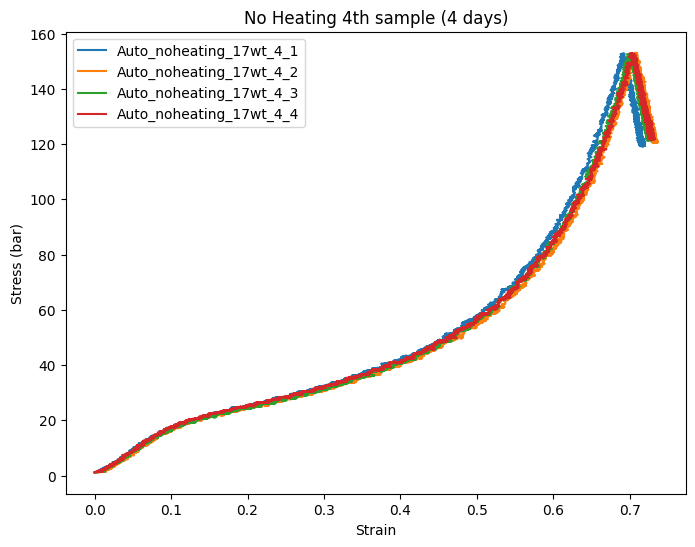

In [70]:
Auto_noheating_17wt_4_1 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-17-4-1-240226_02262024_163853.csv')
Auto_noheating_17wt_4_2 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-17-4-2-240226_02262024_164117.csv')
Auto_noheating_17wt_4_3 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-17-4-3-240226_02262024_164351.csv')
Auto_noheating_17wt_4_4 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-17-4-4-240226_02262024_164621.csv')

data_list = [Auto_noheating_17wt_4_1, Auto_noheating_17wt_4_2, Auto_noheating_17wt_4_3, Auto_noheating_17wt_4_4]

# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

thickness = [109,106,106,105]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('No Heating 4th sample (4 days)')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

# Automembrane Batch 5

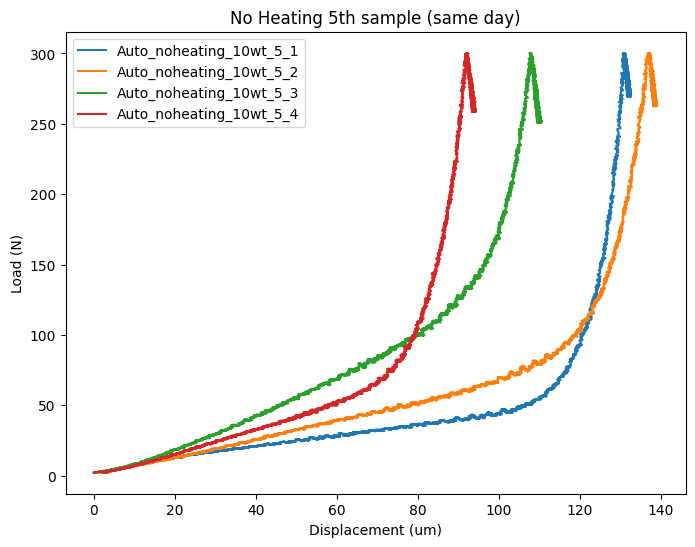

In [71]:
Auto_noheating_10wt_5_1 = pd.read_csv('Data/compression 5/AutoNoheating-10-5-1-240223_02232024_193040.csv')
Auto_noheating_10wt_5_2 = pd.read_csv('Data/compression 5/AutoNoheating-10-5-2-240223_02232024_193342.csv')
Auto_noheating_10wt_5_3 = pd.read_csv('Data/compression 5/AutoNoheating-10-5-3-240223_02232024_193652.csv')
Auto_noheating_10wt_5_4 = pd.read_csv('Data/compression 5/AutoNoheating-10-5-4-240223_02232024_193947.csv')

data_list = [Auto_noheating_10wt_5_1, Auto_noheating_10wt_5_2, Auto_noheating_10wt_5_3, Auto_noheating_10wt_5_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('No Heating 5th sample (same day)')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

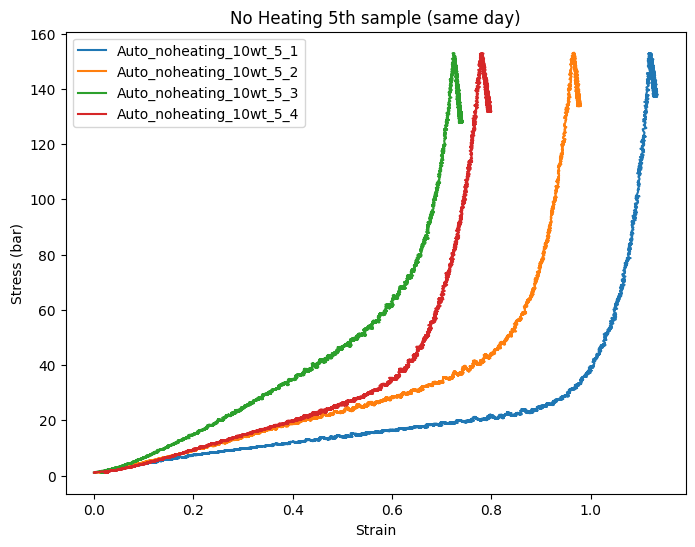

In [72]:
Auto_noheating_10wt_5_1 = pd.read_csv('Data/compression 5/AutoNoheating-10-5-1-240223_02232024_193040.csv')
Auto_noheating_10wt_5_2 = pd.read_csv('Data/compression 5/AutoNoheating-10-5-2-240223_02232024_193342.csv')
Auto_noheating_10wt_5_3 = pd.read_csv('Data/compression 5/AutoNoheating-10-5-3-240223_02232024_193652.csv')
Auto_noheating_10wt_5_4 = pd.read_csv('Data/compression 5/AutoNoheating-10-5-4-240223_02232024_193947.csv')

data_list = [Auto_noheating_10wt_5_1, Auto_noheating_10wt_5_2, Auto_noheating_10wt_5_3, Auto_noheating_10wt_5_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

thickness = [117,142,149,118]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('No Heating 5th sample (same day)')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

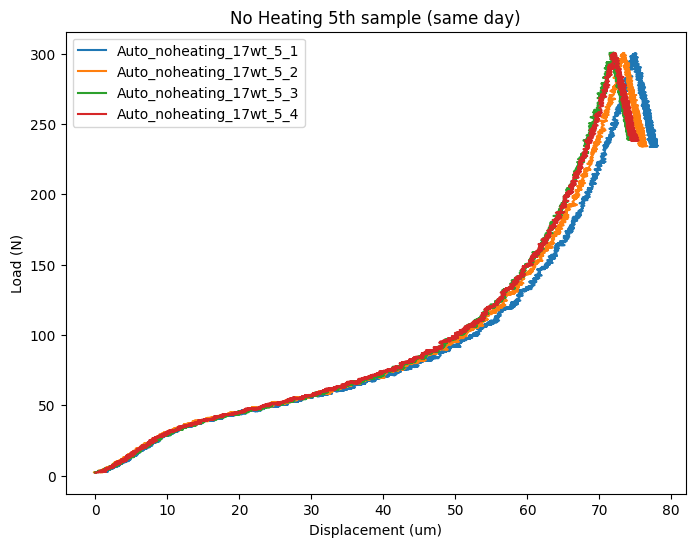

In [73]:
Auto_noheating_17wt_5_1 = pd.read_csv('Data/compression 5/AutoNoheating-17-5-1-240223_02232024_194527.csv')
Auto_noheating_17wt_5_2 = pd.read_csv('Data/compression 5/AutoNoheating-17-5-2-240223_02232024_194752.csv')
Auto_noheating_17wt_5_3 = pd.read_csv('Data/compression 5/AutoNoheating-17-5-3-240223_02232024_195016.csv')
Auto_noheating_17wt_5_4 = pd.read_csv('Data/compression 5/AutoNoheating-17-5-4-240223_02232024_195303.csv')

data_list = [Auto_noheating_17wt_5_1, Auto_noheating_17wt_5_2, Auto_noheating_17wt_5_3, Auto_noheating_17wt_5_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('No Heating 5th sample (same day)')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

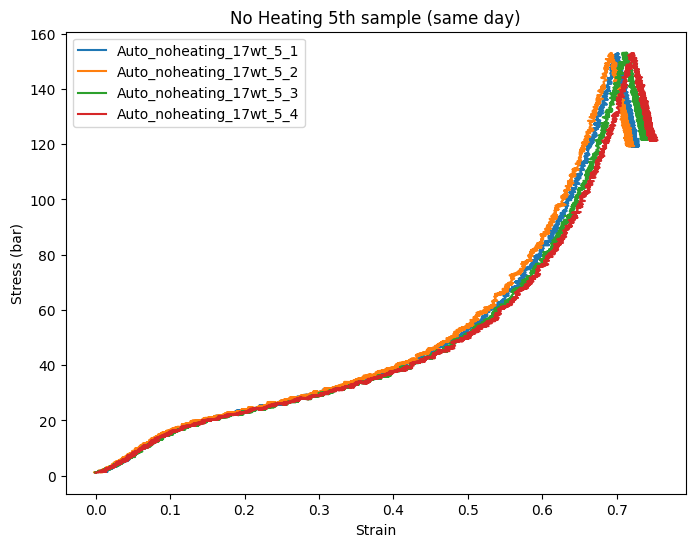

In [74]:
Auto_noheating_17wt_5_1 = pd.read_csv('Data/compression 5/AutoNoheating-17-5-1-240223_02232024_194527.csv')
Auto_noheating_17wt_5_2 = pd.read_csv('Data/compression 5/AutoNoheating-17-5-2-240223_02232024_194752.csv')
Auto_noheating_17wt_5_3 = pd.read_csv('Data/compression 5/AutoNoheating-17-5-3-240223_02232024_195016.csv')
Auto_noheating_17wt_5_4 = pd.read_csv('Data/compression 5/AutoNoheating-17-5-4-240223_02232024_195303.csv')

data_list = [Auto_noheating_17wt_5_1, Auto_noheating_17wt_5_2, Auto_noheating_17wt_5_3, Auto_noheating_17wt_5_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000

thickness = [107,106,101,100]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('No Heating 5th sample (same day)')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

# All 17 and 15wt% samples

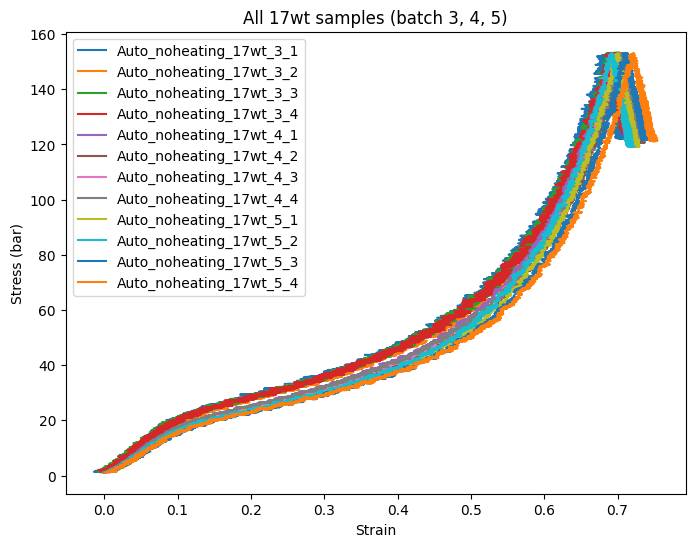

In [75]:
Auto_noheating_17wt_3_1 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-17-3-1-240212_02122024_180801.csv')
Auto_noheating_17wt_3_2 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-17-3-2-240212_02122024_181028.csv')
Auto_noheating_17wt_3_3 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-17-3-3-240212_02122024_181307.csv')
Auto_noheating_17wt_3_4 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-17-3-4-240212_02122024_181657.csv')
Auto_noheating_17wt_4_1 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-17-4-1-240226_02262024_163853.csv')
Auto_noheating_17wt_4_2 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-17-4-2-240226_02262024_164117.csv')
Auto_noheating_17wt_4_3 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-17-4-3-240226_02262024_164351.csv')
Auto_noheating_17wt_4_4 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-17-4-4-240226_02262024_164621.csv')
Auto_noheating_17wt_5_1 = pd.read_csv('Data/compression 5/AutoNoheating-17-5-1-240223_02232024_194527.csv')
Auto_noheating_17wt_5_2 = pd.read_csv('Data/compression 5/AutoNoheating-17-5-2-240223_02232024_194752.csv')
Auto_noheating_17wt_5_3 = pd.read_csv('Data/compression 5/AutoNoheating-17-5-3-240223_02232024_195016.csv')
Auto_noheating_17wt_5_4 = pd.read_csv('Data/compression 5/AutoNoheating-17-5-4-240223_02232024_195303.csv')
data_list = [Auto_noheating_17wt_3_1, Auto_noheating_17wt_3_2, Auto_noheating_17wt_3_3, Auto_noheating_17wt_3_4, Auto_noheating_17wt_4_1, Auto_noheating_17wt_4_2, Auto_noheating_17wt_4_3, Auto_noheating_17wt_4_4, Auto_noheating_17wt_5_1, Auto_noheating_17wt_5_2, Auto_noheating_17wt_5_3, Auto_noheating_17wt_5_4]


thickness = [110,105,105,105,109,106,106,105,107,106,101,100]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000


# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('All 17wt samples (batch 3, 4, 5)')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

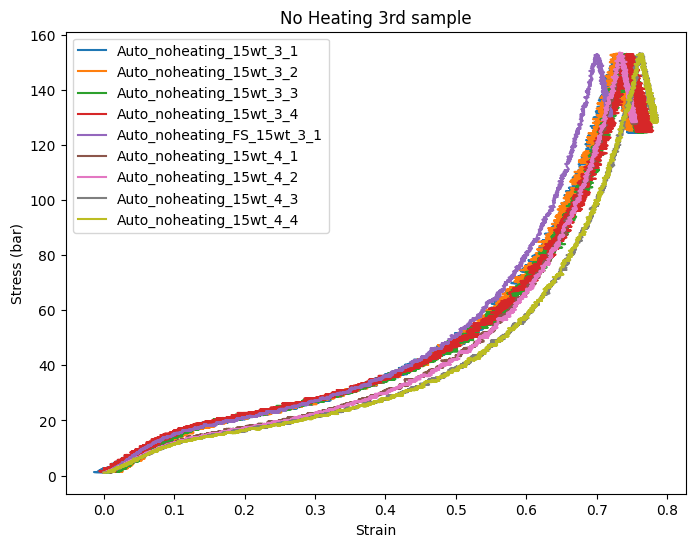

In [76]:
Auto_noheating_15wt_3_1 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-15-3-1-240212_02122024_175519.csv')
Auto_noheating_15wt_3_2 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-15-3-2-240212_02122024_175755.csv')
Auto_noheating_15wt_3_3 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-15-3-3-240212_02122024_180046.csv')
Auto_noheating_15wt_3_4 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheating-15-3-4-240212_02122024_180316.csv')
Auto_noheating_FS_15wt_3_1 = pd.read_csv('Data/Compression Sample NH 10, 12, 15, 17 batch 3/AutoNoheatingFS-15-3-1-240215_02152024_162737.csv')
Auto_noheating_15wt_4_1 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-15-4-1-240226_02262024_162514.csv')
Auto_noheating_15wt_4_2 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-15-4-2-240226_02262024_162808.csv')
Auto_noheating_15wt_4_3 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-15-4-3-240226_02262024_163110.csv')
Auto_noheating_15wt_4_4 = pd.read_csv('Data/compression 4 4 days/AutoNoheating-15-4-4-240226_02262024_163353.csv')


data_list = [Auto_noheating_15wt_3_1, Auto_noheating_15wt_3_2, Auto_noheating_15wt_3_3, Auto_noheating_15wt_3_4, Auto_noheating_FS_15wt_3_1, Auto_noheating_15wt_4_1, Auto_noheating_15wt_4_2, Auto_noheating_15wt_4_3, Auto_noheating_15wt_4_4]

thickness = [103,105,105,105,105,109,103,100,100]

# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('No Heating 3rd sample')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

# 12wt% Heating Block

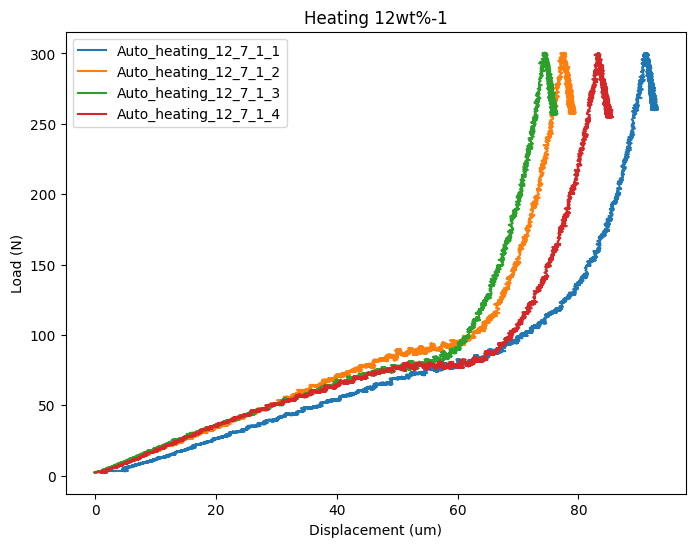

In [77]:
Auto_heating_12_7_1_1 = pd.read_csv('Data/compression 7/AutoHeating-12-7-1-1-240320_03202024_202947.csv')
Auto_heating_12_7_1_2 = pd.read_csv('Data/compression 7/AutoHeating-12-7-1-2-240320_03202024_203323.csv')
Auto_heating_12_7_1_3 = pd.read_csv('Data/compression 7/AutoHeating-12-7-1-3-240320_03202024_203606.csv')
Auto_heating_12_7_1_4 = pd.read_csv('Data/compression 7/AutoHeating-12-7-1-4-240320_03202024_203910.csv')

data_list = [Auto_heating_12_7_1_1, Auto_heating_12_7_1_2, Auto_heating_12_7_1_3, Auto_heating_12_7_1_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Heating 12wt%-1')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

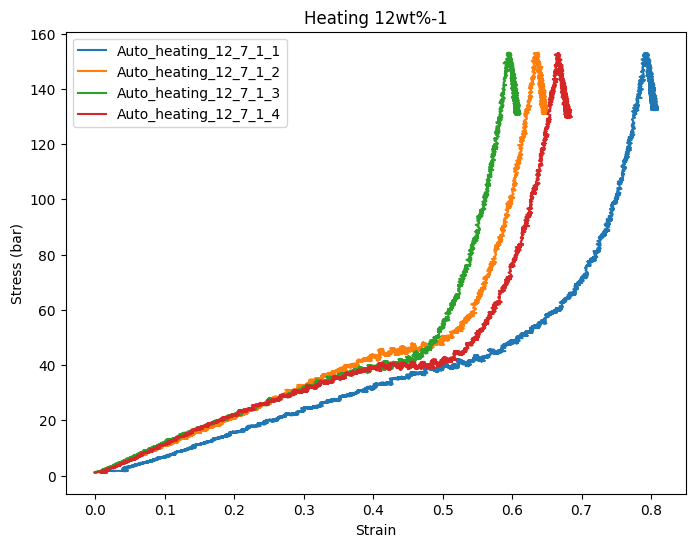

In [78]:
Auto_heating_12_7_1_1 = pd.read_csv('Data/compression 7/AutoHeating-12-7-1-1-240320_03202024_202947.csv')
Auto_heating_12_7_1_2 = pd.read_csv('Data/compression 7/AutoHeating-12-7-1-2-240320_03202024_203323.csv')
Auto_heating_12_7_1_3 = pd.read_csv('Data/compression 7/AutoHeating-12-7-1-3-240320_03202024_203606.csv')
Auto_heating_12_7_1_4 = pd.read_csv('Data/compression 7/AutoHeating-12-7-1-4-240320_03202024_203910.csv')

data_list = [Auto_heating_12_7_1_1, Auto_heating_12_7_1_2, Auto_heating_12_7_1_3, Auto_heating_12_7_1_4]
thickness = [115, 122, 125, 125]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('Heating 12wt%-1')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

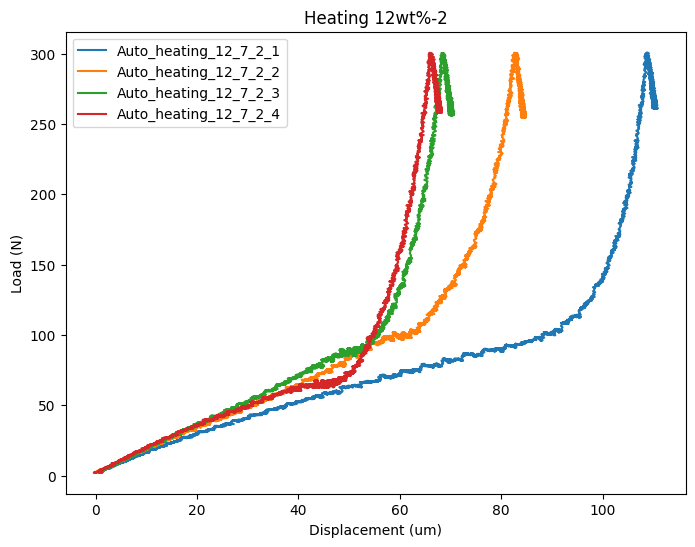

In [79]:
Auto_heating_12_7_2_1 = pd.read_csv('Data/compression 7/AutoHeating-12-7-2-1-240320_03202024_204415.csv')
Auto_heating_12_7_2_2 = pd.read_csv('Data/compression 7/AutoHeating-12-7-2-2-240320_03202024_204706.csv')
Auto_heating_12_7_2_3 = pd.read_csv('Data/compression 7/AutoHeating-12-7-2-3-240320_03202024_204950.csv')
Auto_heating_12_7_2_4 = pd.read_csv('Data/compression 7/AutoHeating-12-7-2-4-240320_03202024_205221.csv')

data_list = [Auto_heating_12_7_2_1, Auto_heating_12_7_2_2, Auto_heating_12_7_2_3, Auto_heating_12_7_2_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Heating 12wt%-2')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

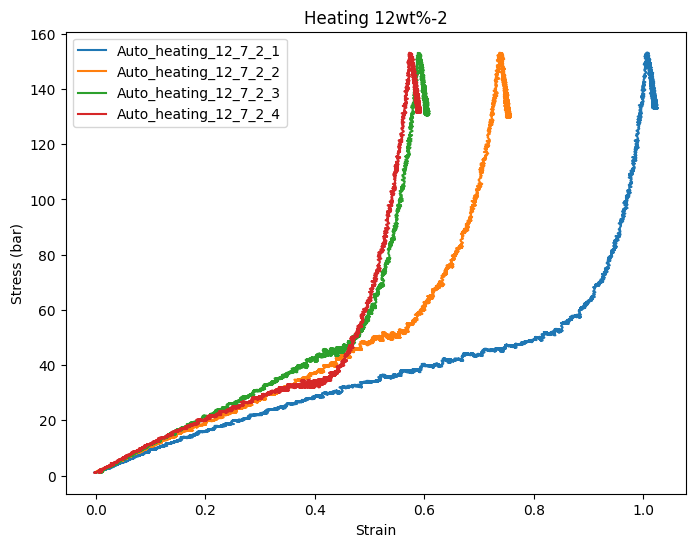

In [80]:
Auto_heating_12_7_2_1 = pd.read_csv('Data/compression 7/AutoHeating-12-7-2-1-240320_03202024_204415.csv')
Auto_heating_12_7_2_2 = pd.read_csv('Data/compression 7/AutoHeating-12-7-2-2-240320_03202024_204706.csv')
Auto_heating_12_7_2_3 = pd.read_csv('Data/compression 7/AutoHeating-12-7-2-3-240320_03202024_204950.csv')
Auto_heating_12_7_2_4 = pd.read_csv('Data/compression 7/AutoHeating-12-7-2-4-240320_03202024_205221.csv')

data_list = [Auto_heating_12_7_2_1, Auto_heating_12_7_2_2, Auto_heating_12_7_2_3, Auto_heating_12_7_2_4]
thickness = [108,112,116,115]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('Heating 12wt%-2')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

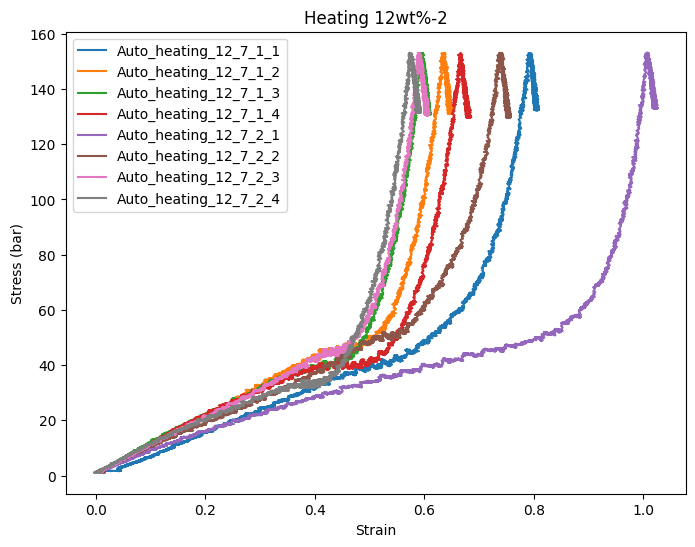

In [81]:
data_list = [Auto_heating_12_7_1_1, Auto_heating_12_7_1_2, Auto_heating_12_7_1_3, Auto_heating_12_7_1_4, Auto_heating_12_7_2_1, Auto_heating_12_7_2_2, Auto_heating_12_7_2_3, Auto_heating_12_7_2_4]
thickness = [115, 122, 125, 125, 108, 112, 116, 115]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('Heating 12wt%-2')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

# Batch 8 Heating Block

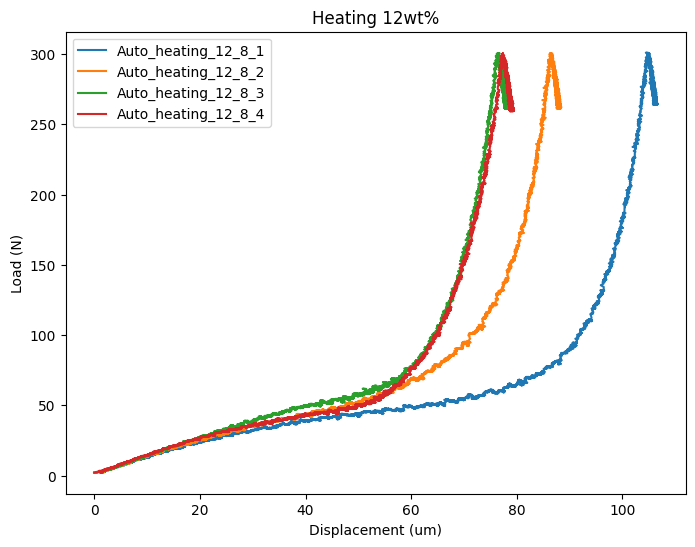

In [82]:
Auto_heating_12_8_1 = pd.read_csv('Data/compression 8/AutoHeating-12-8-1-1-240328_03282024_152144.csv')
Auto_heating_12_8_2 = pd.read_csv('Data/compression 8/AutoHeating-12-8-1-2-240328_03282024_152416.csv')
Auto_heating_12_8_3 = pd.read_csv('Data/compression 8/AutoHeating-12-8-1-3-240328_03282024_152657.csv')
Auto_heating_12_8_4 = pd.read_csv('Data/compression 8/AutoHeating-12-8-1-4-240328_03282024_152944.csv')

data_list = [Auto_heating_12_8_1, Auto_heating_12_8_2, Auto_heating_12_8_3, Auto_heating_12_8_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Heating 12wt%')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

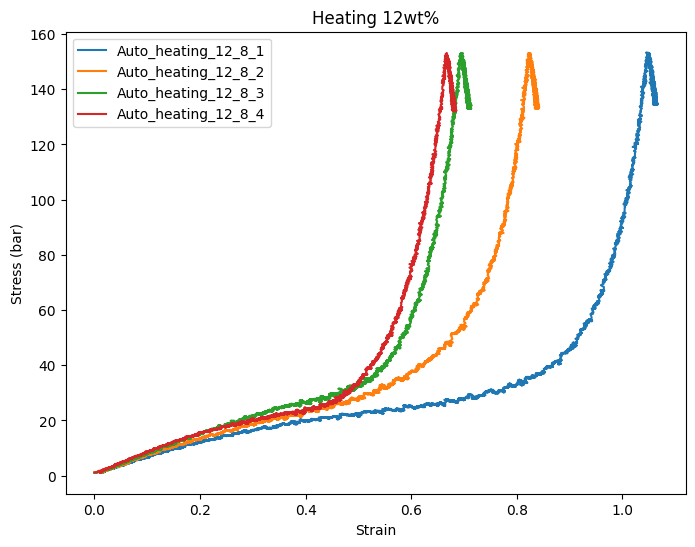

In [83]:
Auto_heating_12_8_1 = pd.read_csv('Data/compression 8/AutoHeating-12-8-1-1-240328_03282024_152144.csv')
Auto_heating_12_8_2 = pd.read_csv('Data/compression 8/AutoHeating-12-8-1-2-240328_03282024_152416.csv')
Auto_heating_12_8_3 = pd.read_csv('Data/compression 8/AutoHeating-12-8-1-3-240328_03282024_152657.csv')
Auto_heating_12_8_4 = pd.read_csv('Data/compression 8/AutoHeating-12-8-1-4-240328_03282024_152944.csv')

data_list = [Auto_heating_12_8_1, Auto_heating_12_8_2, Auto_heating_12_8_3, Auto_heating_12_8_4]
thickness = [100,105,110,116]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('Heating 12wt%')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

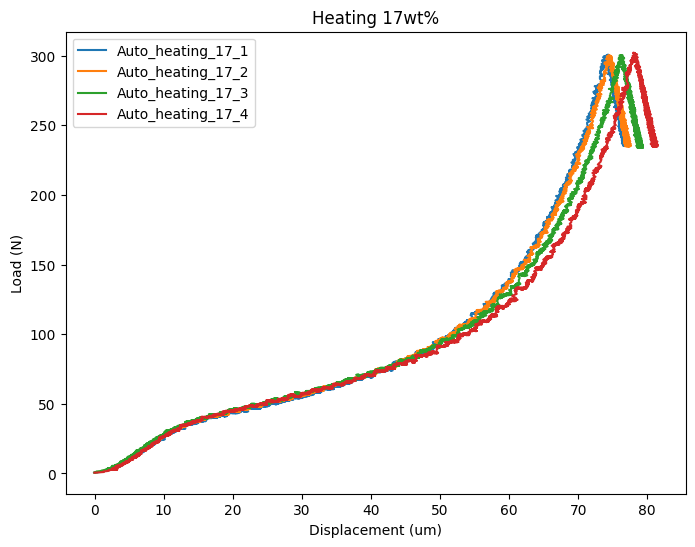

In [84]:
Auto_heating_17_1 = pd.read_csv('Data/compression 8/AutoHeating-17-8-1-1-240328_03282024_153404.csv')
Auto_heating_17_2 = pd.read_csv('Data/compression 8/AutoHeating-17-8-1-2-240328_03282024_153634.csv')
Auto_heating_17_3 = pd.read_csv('Data/compression 8/AutoHeating-17-8-1-3-240328_03282024_153853.csv')
Auto_heating_17_4 = pd.read_csv('Data/compression 8/AutoHeating-17-8-1-4-240328_03282024_154142.csv')

data_list = [Auto_heating_17_1, Auto_heating_17_2, Auto_heating_17_3, Auto_heating_17_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 0.5]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Heating 17wt%')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

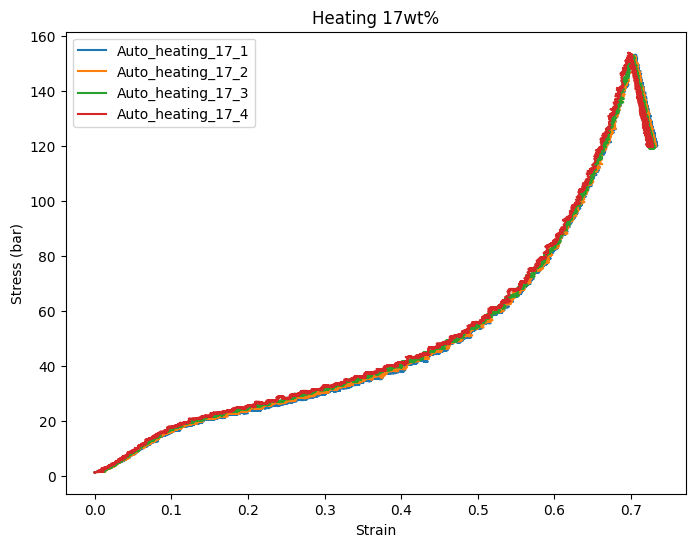

In [85]:
Auto_heating_17_1 = pd.read_csv('Data/compression 8/AutoHeating-17-8-1-1-240328_03282024_153404.csv')
Auto_heating_17_2 = pd.read_csv('Data/compression 8/AutoHeating-17-8-1-2-240328_03282024_153634.csv')
Auto_heating_17_3 = pd.read_csv('Data/compression 8/AutoHeating-17-8-1-3-240328_03282024_153853.csv')
Auto_heating_17_4 = pd.read_csv('Data/compression 8/AutoHeating-17-8-1-4-240328_03282024_154142.csv')

data_list = [Auto_heating_17_1, Auto_heating_17_2, Auto_heating_17_3, Auto_heating_17_4]
thickness = [103,104,107,109]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('Heating 17wt%')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

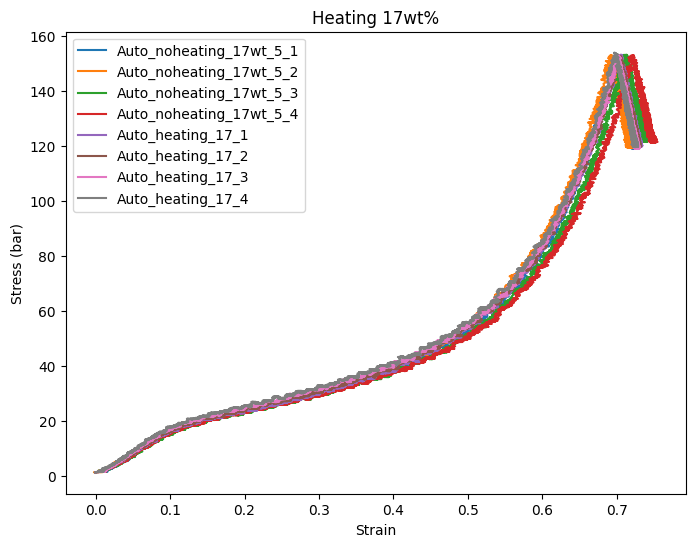

In [86]:
data_list = [Auto_noheating_17wt_5_1, Auto_noheating_17wt_5_2, Auto_noheating_17wt_5_3, Auto_noheating_17wt_5_4, Auto_heating_17_1, Auto_heating_17_2, Auto_heating_17_3, Auto_heating_17_4]

thickness = [107,106,101,100,103,104,107,109]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('Heating 17wt%')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

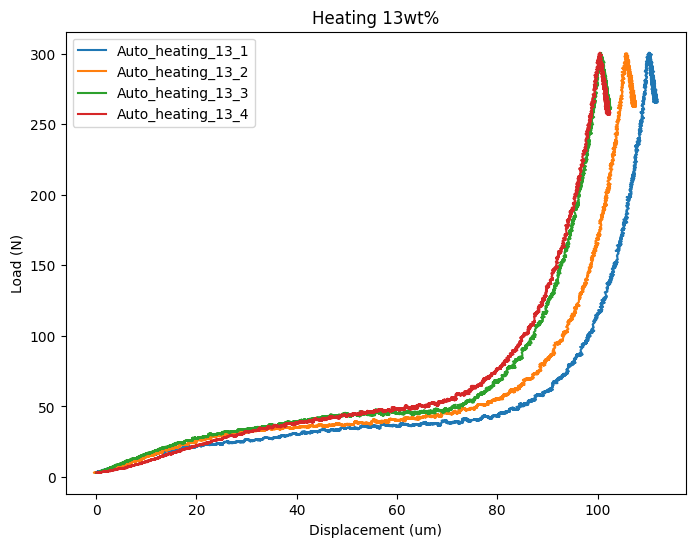

In [87]:
Auto_heating_13_1 = pd.read_csv('Data/compression 9/AutoHeating-13-9-1--240404_04042024_173756.csv')
Auto_heating_13_2 = pd.read_csv('Data/compression 9/AutoHeating-13-9-2--240404_04042024_174116.csv')
Auto_heating_13_3 = pd.read_csv('Data/compression 9/AutoHeating-13-9-3--240404_04042024_174359.csv')
Auto_heating_13_4 = pd.read_csv('Data/compression 9/AutoHeating-13-9-4--240404_04042024_174655.csv')

data_list = [Auto_heating_13_1, Auto_heating_13_2, Auto_heating_13_3, Auto_heating_13_4]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 3]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Heating 13wt%')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

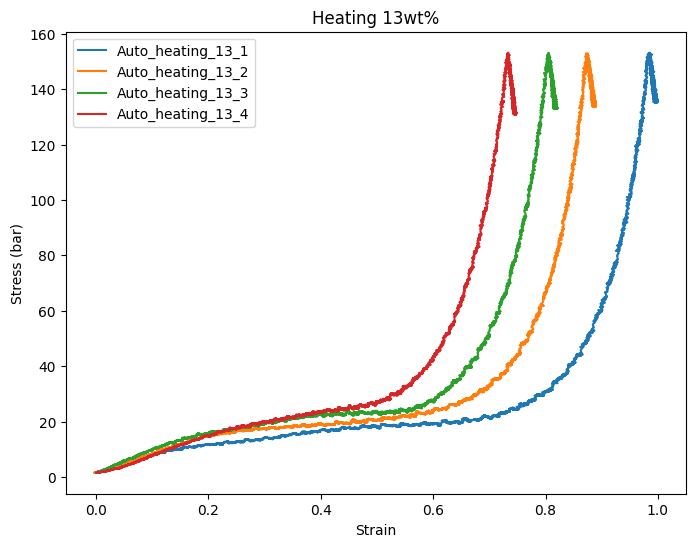

In [88]:
Auto_heating_13_1 = pd.read_csv('Data/compression 9/AutoHeating-13-9-1--240404_04042024_173756.csv')
Auto_heating_13_2 = pd.read_csv('Data/compression 9/AutoHeating-13-9-2--240404_04042024_174116.csv')
Auto_heating_13_3 = pd.read_csv('Data/compression 9/AutoHeating-13-9-3--240404_04042024_174359.csv')
Auto_heating_13_4 = pd.read_csv('Data/compression 9/AutoHeating-13-9-4--240404_04042024_174655.csv')

data_list = [Auto_heating_13_1, Auto_heating_13_2, Auto_heating_13_3, Auto_heating_13_4]
thickness = [112,121,125,137]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >3]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('Heating 13wt%')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

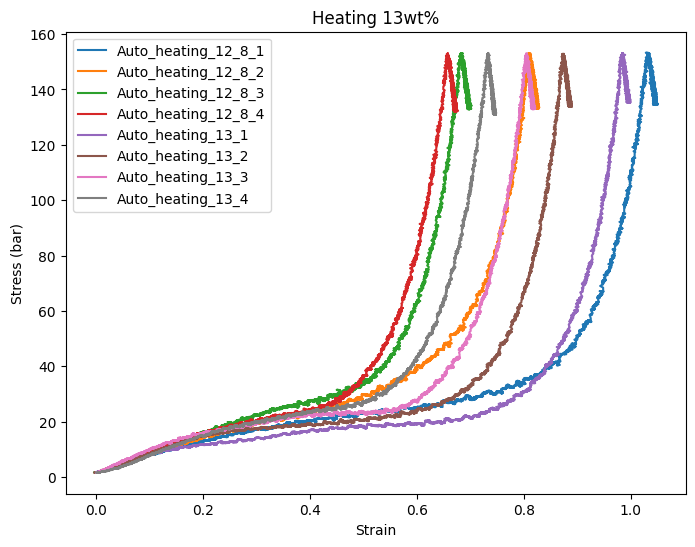

In [89]:
data_list = [Auto_heating_12_8_1, Auto_heating_12_8_2, Auto_heating_12_8_3, Auto_heating_12_8_4 ,Auto_heating_13_1, Auto_heating_13_2, Auto_heating_13_3, Auto_heating_13_4]
thickness = [100,105,110,116,112,121,125,137]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >3]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('Heating 13wt%')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

# AD Membrane

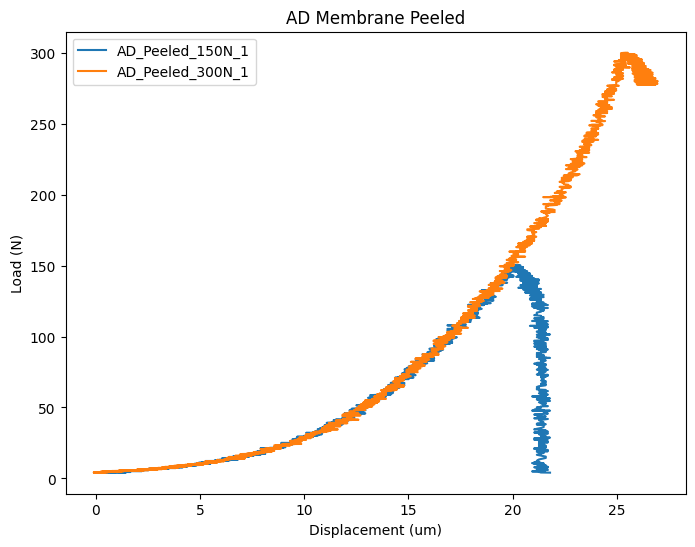

In [90]:
AD_Peeled_150N_1 = pd.read_csv('PDMS and AD/AD Peeled Test 1-1 150N.csv')
AD_Peeled_300N_1 = pd.read_csv('PDMS and AD/AD Peeled Test 1-1 300N_02142024_161038.csv')

data_list = [AD_Peeled_150N_1, AD_Peeled_300N_1]

# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 4]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('AD Membrane Peeled')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

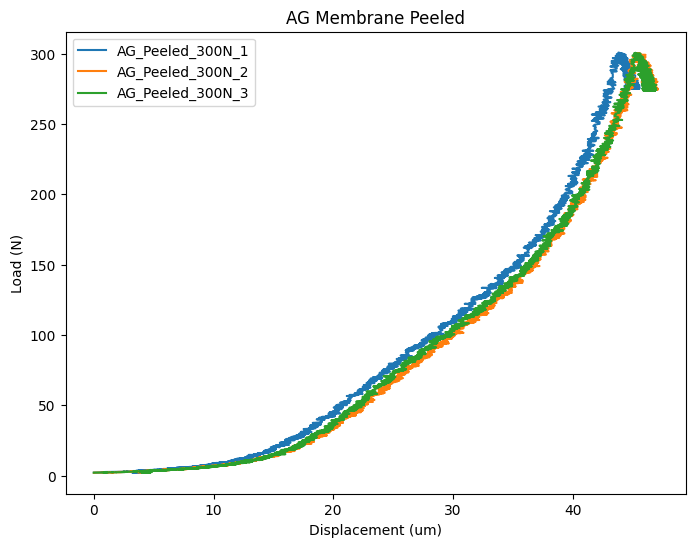

In [91]:
AG_Peeled_300N_1 = pd.read_csv('Data/AG AL compression 300N/AG membrane Peeled 300N_1_1_03192024_183239.csv')
AG_Peeled_300N_2 = pd.read_csv('Data/AG AL compression 300N/AG membrane Peeled 300N_1_2_03192024_183508.csv')    
AG_Peeled_300N_3 = pd.read_csv('Data/AG AL compression 300N/AG membrane Peeled 300N_1_3_03192024_183719.csv')

data_list = [AG_Peeled_300N_1, AG_Peeled_300N_2, AG_Peeled_300N_3]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('AG Membrane Peeled')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

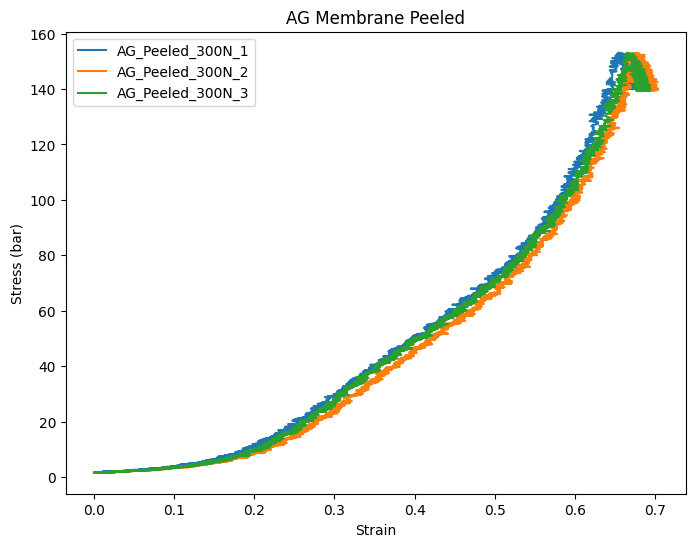

In [92]:
thickness = [62, 62, 62]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >3]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('AG Membrane Peeled')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

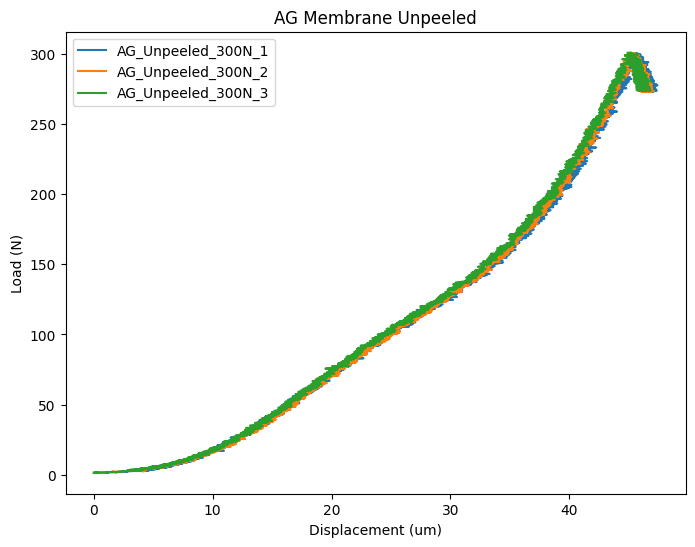

In [93]:
AG_Unpeeled_300N_1 = pd.read_csv('Data/AG AL compression 300N/AG membrane Unpeeled 300N_1_1_03192024_182300.csv')
AG_Unpeeled_300N_2 = pd.read_csv('Data/AG AL compression 300N/AG membrane Unpeeled 300N_1_2_03192024_182502.csv')
AG_Unpeeled_300N_3 = pd.read_csv('Data/AG AL compression 300N/AG membrane Unpeeled 300N_1_3_03192024_182705.csv')

data_list = [AG_Unpeeled_300N_1, AG_Unpeeled_300N_2, AG_Unpeeled_300N_3]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 1.5]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('AG Membrane Unpeeled')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

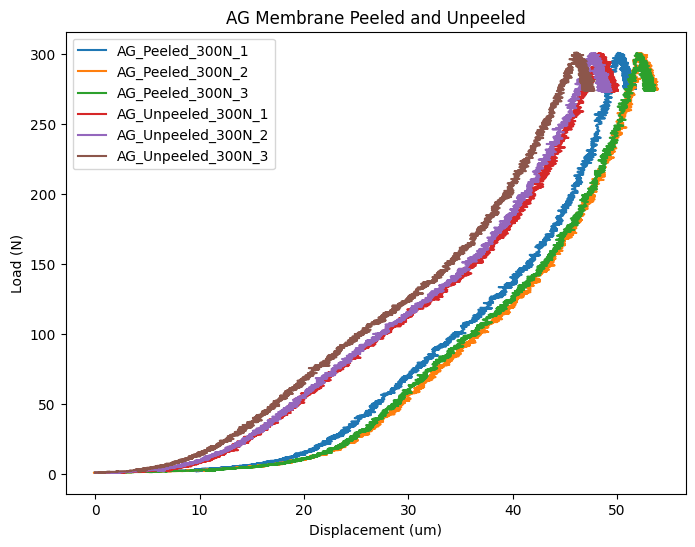

In [94]:
AG_Peeled_300N_1 = pd.read_csv('Data/AG AL compression 300N/AG membrane Peeled 300N_1_1_03192024_183239.csv')
AG_Peeled_300N_2 = pd.read_csv('Data/AG AL compression 300N/AG membrane Peeled 300N_1_2_03192024_183508.csv')    
AG_Peeled_300N_3 = pd.read_csv('Data/AG AL compression 300N/AG membrane Peeled 300N_1_3_03192024_183719.csv')
AG_Unpeeled_300N_1 = pd.read_csv('Data/AG AL compression 300N/AG membrane Unpeeled 300N_1_1_03192024_182300.csv')
AG_Unpeeled_300N_2 = pd.read_csv('Data/AG AL compression 300N/AG membrane Unpeeled 300N_1_2_03192024_182502.csv')
AG_Unpeeled_300N_3 = pd.read_csv('Data/AG AL compression 300N/AG membrane Unpeeled 300N_1_3_03192024_182705.csv')

data_list = [AG_Peeled_300N_1, AG_Peeled_300N_2, AG_Peeled_300N_3, AG_Unpeeled_300N_1, AG_Unpeeled_300N_2, AG_Unpeeled_300N_3]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 1]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('AG Membrane Peeled and Unpeeled')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

In [95]:
thickness = [138, 138, 138]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >3]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('AG Membrane Unpeeled')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

IndexError: list index out of range

In [ ]:
AL_Peeled_300N_1 = pd.read_csv('Data/AG AL compression 300N/AL membrane Peeled 300N_1_1_03192024_180632.csv')
AL_Peeled_300N_2 = pd.read_csv('Data/AG AL compression 300N/AL membrane Peeled 300N_1_2_03192024_181012.csv')
AL_Peeled_300N_3 = pd.read_csv('Data/AG AL compression 300N/AL membrane Peeled 300N_1_3_03192024_181246.csv')

data_list = [AL_Peeled_300N_1, AL_Peeled_300N_2, AL_Peeled_300N_3]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 3]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('AL Membrane Peeled')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

In [ ]:
AL_Peeled_300N_1 = pd.read_csv('Data/AG AL compression 300N/AL membrane Peeled 300N_2_1_03202024_154059.csv')
AL_Peeled_300N_2 = pd.read_csv('Data/AG AL compression 300N/AL membrane Peeled 300N_2_2_03202024_154426.csv')
AL_Peeled_300N_3 = pd.read_csv('Data/AG AL compression 300N/AL membrane Peeled 300N_2_3_03202024_154810.csv')

data_list = [AL_Peeled_300N_1, AL_Peeled_300N_2, AL_Peeled_300N_3]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 3]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('AL Membrane Peeled')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

In [ ]:
thickness = [52, 52, 52]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >3]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('AL Membrane Peeled')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

In [ ]:
AL_Unpeeled_300N_1 = pd.read_csv('Data/AG AL compression 300N/AL membrane Unpeeled 300N_1_1_03192024_181607.csv')   
AL_Unpeeled_300N_2 = pd.read_csv('Data/AG AL compression 300N/AL membrane Unpeeled 300N_1_2_03192024_181819.csv')
AL_Unpeeled_300N_3 = pd.read_csv('Data/AG AL compression 300N/AL membrane Unpeeled 300N_1_3_03192024_182023.csv')

data_list = [AL_Unpeeled_300N_1, AL_Unpeeled_300N_2, AL_Unpeeled_300N_3]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 3]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('AL Membrane Unpeeled')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

In [ ]:
thickness = [130, 130, 130]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >3]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('AL Membrane Unpeeled')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

In [ ]:
# plot AL peeled and unpeeled together without thickness
AL_Peeled_300N_1 = pd.read_csv('Data/AG AL compression 300N/AL membrane Peeled 300N_1_1_03192024_180632.csv')
AL_Peeled_300N_2 = pd.read_csv('Data/AG AL compression 300N/AL membrane Peeled 300N_1_2_03192024_181012.csv')
AL_Peeled_300N_3 = pd.read_csv('Data/AG AL compression 300N/AL membrane Peeled 300N_1_3_03192024_181246.csv')
AL_Unpeeled_300N_1 = pd.read_csv('Data/AG AL compression 300N/AL membrane Unpeeled 300N_1_1_03192024_181607.csv')
AL_Unpeeled_300N_2 = pd.read_csv('Data/AG AL compression 300N/AL membrane Unpeeled 300N_1_2_03192024_181819.csv')
AL_Unpeeled_300N_3 = pd.read_csv('Data/AG AL compression 300N/AL membrane Unpeeled 300N_1_3_03192024_182023.csv')

data_list = [AL_Peeled_300N_1, AL_Peeled_300N_2, AL_Peeled_300N_3, AL_Unpeeled_300N_1, AL_Unpeeled_300N_2, AL_Unpeeled_300N_3]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 1.5]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('AL Membrane Unpeeled and Peeled')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

In [ ]:
AD_Peeled_300N_1 = pd.read_csv('Data/AG AL compression 300N/AD membrane Peeled 300N_1_1_03202024_194021.csv')
AD_Peeled_300N_2 = pd.read_csv('Data/AG AL compression 300N/AD membrane Peeled 300N_1_2_03202024_194546.csv')
AD_Peeled_300N_3 = pd.read_csv('Data/AG AL compression 300N/AD membrane Peeled 300N_1_3_03202024_194850.csv')

data_list = [AD_Peeled_300N_1, AD_Peeled_300N_2, AD_Peeled_300N_3]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 3]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('AD Membrane Peeled')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
thickness = [48, 48, 48]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >3]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('AD Membrane Peeled')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

In [ ]:
AD_Unpeeled_300N_1 = pd.read_csv('Data/AG AL compression 300N/AD membrane Unpeeled 300N_1_1_03202024_202455.csv')
AD_Unpeeled_300N_2 = pd.read_csv('Data/AG AL compression 300N/AD membrane Unpeeled 300N_1_2_03202024_210204.csv')
AD_Unpeeled_300N_3 = pd.read_csv('Data/AG AL compression 300N/AD membrane Unpeeled 300N_1_3_03202024_210431.csv')

data_list = [AD_Unpeeled_300N_1, AD_Unpeeled_300N_2, AD_Unpeeled_300N_3]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 3]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('AD Membrane Peeled')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
thickness = [118, 118, 118]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >3]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('AD Membrane Unpeeled')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

In [ ]:
# plot AD peeled and unpeeled together without thickness
AD_Peeled_300N_1 = pd.read_csv('Data/AG AL compression 300N/AD membrane Peeled 300N_1_1_03202024_194021.csv')
AD_Peeled_300N_2 = pd.read_csv('Data/AG AL compression 300N/AD membrane Peeled 300N_1_2_03202024_194546.csv')
AD_Peeled_300N_3 = pd.read_csv('Data/AG AL compression 300N/AD membrane Peeled 300N_1_3_03202024_194850.csv')
AD_Unpeeled_300N_1 = pd.read_csv('Data/AG AL compression 300N/AD membrane Unpeeled 300N_1_1_03202024_202455.csv')
AD_Unpeeled_300N_2 = pd.read_csv('Data/AG AL compression 300N/AD membrane Unpeeled 300N_1_2_03202024_210204.csv')
AD_Unpeeled_300N_3 = pd.read_csv('Data/AG AL compression 300N/AD membrane Unpeeled 300N_1_3_03202024_210431.csv')

data_list = [AD_Peeled_300N_1, AD_Peeled_300N_2, AD_Peeled_300N_3, AD_Unpeeled_300N_1, AD_Unpeeled_300N_2, AD_Unpeeled_300N_3]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 1.5]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('AD Membrane Unpeeled and Peeled')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# plot ad, ag, al peeled together
AD_Peeled_300N_1 = pd.read_csv('Data/AG AL compression 300N/AD membrane Peeled 300N_1_1_03202024_194021.csv')
AD_Peeled_300N_2 = pd.read_csv('Data/AG AL compression 300N/AD membrane Peeled 300N_1_2_03202024_194546.csv')
AD_Peeled_300N_3 = pd.read_csv('Data/AG AL compression 300N/AD membrane Peeled 300N_1_3_03202024_194850.csv')
AG_Peeled_300N_1 = pd.read_csv('Data/AG AL compression 300N/AG membrane Peeled 300N_1_1_03192024_183239.csv')
AG_Peeled_300N_2 = pd.read_csv('Data/AG AL compression 300N/AG membrane Peeled 300N_1_2_03192024_183508.csv')
AG_Peeled_300N_3 = pd.read_csv('Data/AG AL compression 300N/AG membrane Peeled 300N_1_3_03192024_183719.csv')
AL_Peeled_300N_1 = pd.read_csv('Data/AG AL compression 300N/AL membrane Peeled 300N_1_1_03192024_180632.csv')
AL_Peeled_300N_2 = pd.read_csv('Data/AG AL compression 300N/AL membrane Peeled 300N_1_2_03192024_181012.csv')
AL_Peeled_300N_3 = pd.read_csv('Data/AG AL compression 300N/AL membrane Peeled 300N_1_3_03192024_181246.csv')

data_list = [AD_Peeled_300N_1, AD_Peeled_300N_2, AD_Peeled_300N_3, AG_Peeled_300N_1, AG_Peeled_300N_2, AG_Peeled_300N_3, AL_Peeled_300N_1, AL_Peeled_300N_2, AL_Peeled_300N_3]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 3]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('AD Membrane Peeled')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

# type 1

In [ ]:
type_1_2 = pd.read_csv('Data/type 1 compression/Support type 1-2_04162024_185524.csv')
type_1_3 = pd.read_csv('Data/type 1 compression/Support type 1-3_04162024_185726.csv')
type_1_3_same_point = pd.read_csv('Data/type 1 compression/Support type 1-3 - same point_04162024_185949.csv')
data_list = [type_1_2, type_1_3, type_1_3_same_point]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 3]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Type 1 Compression Test')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#type_1_1 = pd.read_csv('Data/type 1 compression/Support type 1-1_04162024_185320.csv')
type_1_2 = pd.read_csv('Data/type 1 compression/Support type 1-2_04162024_185524.csv')
type_1_3 = pd.read_csv('Data/type 1 compression/Support type 1-3_04162024_185726.csv')
type_1_3_same_point = pd.read_csv('Data/type 1 compression/Support type 1-3 - same point_04162024_185949.csv')

data_list = [type_1_2, type_1_3, type_1_3_same_point]

thickness = [50,50,21]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('Type 1 Compression Test')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

In [ ]:
# now shift the curve from the highest point
data_list = [type_1_2, type_1_3, type_1_3_same_point]
thickness = [50,50,21]
# convert in to um
for i in range(len(data_list)): 
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness[i]
# find the highest point
max_stress = []
for i in range(len(data_list)):
    max_stress.append(data_list[i]['stress (bar)'].max())
max_stress = np.array(max_stress)
max_stress = max_stress.max()
# now make all the highest point at the same strain which is the strain at the highest point of the first curve
for i in range(len(data_list)):
    data_list[i]['strain'] = data_list[i]['strain'] - data_list[i]['strain'][data_list[i]['stress (bar)'].idxmax()]
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >2]
    data_strain = data_list[0][data_list[0]['Ch:Load (N)'] >2]['strain']
    plt.plot(data['strain']-data_strain.iloc[0], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('Type 1 Compression Test')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()



# Batch 10

In [ ]:
Auto_heating_17_10_1 = pd.read_csv('Data/compression 10/AutoHeating-17-10-1-240424_04242024_224404.csv')
Auto_heating_17_10_2 = pd.read_csv('Data/compression 10/AutoHeating-17-10-2-240424_04242024_224654.csv')
Auto_heating_17_10_3 = pd.read_csv('Data/compression 10/AutoHeating-17-10-3-240424_04242024_224921.csv')
Auto_heating_17_10_4 = pd.read_csv('Data/compression 10/AutoHeating-17-10-4-240424_04242024_225129.csv')
Auto_heating_17_10_5 = pd.read_csv('Data/compression 10/AutoHeating-17-10-5-240424_04242024_232454.csv')
Auto_heating_17_10_6 = pd.read_csv('Data/compression 10/AutoHeating-17-10-6-240424_04242024_232735.csv')
Auto_heating_17_10_7 = pd.read_csv('Data/compression 10/AutoHeating-17-10-7-240424_04242024_232950.csv')   
Auto_heating_17_10_7_samepoint = pd.read_csv('Data/compression 10/AutoHeating-17-10-7-samepoint-240424_04242024_233201.csv')

data_list = [Auto_heating_17_10_1, Auto_heating_17_10_2, Auto_heating_17_10_3, Auto_heating_17_10_4, Auto_heating_17_10_5, Auto_heating_17_10_6, Auto_heating_17_10_7, Auto_heating_17_10_7_samepoint]
# convert in to um
for i in range(len(data_list)):
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] > 2]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['S:LVDT (um)'] = data['S:LVDT (um)'] - data['S:LVDT (um)'].iloc[0]
    plt.plot(data['S:LVDT (um)'], data['Ch:Load (N)'], label=data_name)
# show title and labels
plt.title('Heating 17wt%')
plt.xlabel('Displacement (um)')
plt.ylabel('Load (N)')
plt.legend(loc='upper left')
plt.show()  

In [ ]:
# determine the thickness by subtracting 0 by 'S:LVDT (um)' at 2N in 'Ch:Load (N)'
thickness = []
for i in range(len(data_list)):
    thickness.append(-data_list[i]['S:LVDT (um)'][data_list[i]['Ch:Load (N)'] > 2].iloc[0])
# convert in to um
thickness

In [ ]:
# convert in to um
for i in range(len(data_list)): 
    thickness = -data_list[i]['S:LVDT (um)'][data_list[i]['Ch:Load (N)'] > 2].iloc[0]
    data_list[i]['S:LVDT (um)'] = data_list[i]['S:LVDT (in)'] * 25.4 * 1000
    # create stress column which is load / area, the area is 19.635 mm^2
    data_list[i]['stress (bar)'] = data_list[i]['Ch:Load (N)'] / 19.635 *10
    # create strain column which is displacement / thickness, the thickness is shown above
    data_list[i]['strain'] = data_list[i]['S:LVDT (um)'] / thickness
    
# Plot these in the same graph to compare them
plt.figure(figsize=(8, 6))
for i in range(len(data_list)):
    data_name = namestr(data_list[i], globals())
    data = data_list[i][data_list[i]['Ch:Load (N)'] >3]
    # shift the data so that the first point is at 0 in 'S:LVDT (in)'
    data['strain'] = data['strain'] - data['strain'].iloc[0]
    plt.plot(data['strain'], data['stress (bar)'], label=data_name)
# show title and labels
plt.title('Heating 17wt%')
#plt.xlim(0,0.2)
#plt.ylim(0,30)
plt.xlabel('Strain')
plt.ylabel('Stress (bar)')
plt.legend(loc='upper left')
plt.show()  

In [ ]:
def _prepare_solution(stock_weight_percent, desired_weight_percent, total_vol):
        rho_solution = 1.114867
        rho_solvent = 1
        C_i = stock_weight_percent/100
        C_f = desired_weight_percent/100
        V_f = total_vol
        V_c = round(((C_i-C_f)*V_f*rho_solution)/(C_i*rho_solution - C_f*rho_solution + C_f*rho_solvent),0)
        V_i = round(V_f - V_c,0)
        print(V_c, V_i)

In [ ]:
_prepare_solution(17,10,1000)

In [ ]:
_prepare_solution(17,12,1000)

In [ ]:
_prepare_solution(17,15,1000)